# CogSci 2021 figures & analysis
## Setup

In [1]:
# set up imports
import os
import sys

from scoping_simulations.utils.directories import PROJ_DIR, DF_DIR, STIM_DIR

In [2]:
from scoping_simulations.model.Subgoal_Planning_Agent import *
import scoping_simulations.utils.blockworld as bw
import scoping_simulations.utils.blockworld_library as bl

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from scipy import stats
import math

import itertools

import random
from tqdm.notebook import tqdm
import p_tqdm

In [3]:
import scoping_simulations.model.utils.decomposition_functions

In [4]:
import scipy.stats as st

In [5]:
import re
import ast


def str2array(s):
    # strip "array" and parentheses
    s = re.sub("\[array\(", "", s.strip())
    s = re.sub("\)]", "", s.strip())
    # Remove space after [
    s = re.sub("\[ +", "[", s.strip())
    # Replace commas and spaces
    s = re.sub("[,\s]+", ", ", s)
    return np.array(ast.literal_eval(s))


def str2list(s):
    if s is np.nan:
        return s
    # strip "array" and parentheses
    s = re.sub("\[array\(", "", s.strip())
    s = re.sub("\)]", "", s.strip())
    # Remove space after [
    s = re.sub("\[ +", "[", s.strip())
    # Replace commas and spaces
    s = re.sub("[,\s]+", ", ", s)
    return list(ast.literal_eval(s))

In [6]:
# helper function for pd.agg
def item(x):
    return x.tail(1).item()

In [7]:
# inline plots
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Plot styling:

In [8]:
plt.rcParams["figure.figsize"] = (7, 7)
plt.rcParams.update({"font.size": 26})

In [9]:
from matplotlib import rc

# plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.sans-serif"] = ["Helvetica"]
rc(
    "text.latex",
    preamble=r"\usepackage{tgheros} \usepackage{newtxsf} \renewcommand{\familydefault}{\sfdefault} \usepackage{mathastext}",
)  # sets the font via latex preamble—only way to autoset tick labels?

In [10]:
# display all columns
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 20)
pd.set_option("display.max_colwidth", 100)
pd.set_option("display.min_rows", 12)

## Loading data
Let's load the results of the experiment

In [11]:
df_paths = [
    "simulated lookaheads BFS3/final_norep_52_of_52.csv",
    "simulated lookaheads BFS3/final_norep_1_of_52.csv",
    "simulated lookaheads BFS3/final_norep_2_of_52.csv",
    "simulated lookaheads BFS3/final_norep_3_of_52.csv",
    "simulated lookaheads BFS3/final_norep_4_of_52.csv",
    "simulated lookaheads BFS3/final_norep_5_of_52.csv",
    "simulated lookaheads BFS3/final_norep_6_of_52.csv",
    "simulated lookaheads BFS3/final_norep_7_of_52.csv",
    "simulated lookaheads BFS3/final_norep_8_of_52.csv",
    "simulated lookaheads BFS3/final_norep_9_of_52.csv",
    "simulated lookaheads BFS3/final_norep_10_of_52.csv",
    "simulated lookaheads BFS3/final_norep_11_of_52.csv",
    "simulated lookaheads BFS3/final_norep_12_of_52.csv",
    "simulated lookaheads BFS3/final_norep_13_of_52.csv",
    "simulated lookaheads BFS3/final_norep_14_of_52.csv",
    "simulated lookaheads BFS3/final_norep_15_of_52.csv",
    "simulated lookaheads BFS3/final_norep_16_of_52.csv",
    "simulated lookaheads BFS3/final_norep_17_of_52.csv",
    "simulated lookaheads BFS3/final_norep_18_of_52.csv",
    "simulated lookaheads BFS3/final_norep_19_of_52.csv",
    "simulated lookaheads BFS3/final_norep_20_of_52.csv",
    "simulated lookaheads BFS3/final_norep_21_of_52.csv",
    "simulated lookaheads BFS3/final_norep_22_of_52.csv",
    "simulated lookaheads BFS3/final_norep_23_of_52.csv",
    "simulated lookaheads BFS3/final_norep_24_of_52.csv",
    "simulated lookaheads BFS3/final_norep_25_of_52.csv",
    "simulated lookaheads BFS3/final_norep_26_of_52.csv",
    "simulated lookaheads BFS3/final_norep_27_of_52.csv",
    "simulated lookaheads BFS3/final_norep_28_of_52.csv",
    "simulated lookaheads BFS3/final_norep_29_of_52.csv",
    "simulated lookaheads BFS3/final_norep_30_of_52.csv",
    "simulated lookaheads BFS3/final_norep_31_of_52.csv",
    "simulated lookaheads BFS3/final_norep_32_of_52.csv",
    "simulated lookaheads BFS3/final_norep_33_of_52.csv",
    "simulated lookaheads BFS3/final_norep_34_of_52.csv",
    "simulated lookaheads BFS3/final_norep_35_of_52.csv",
    "simulated lookaheads BFS3/final_norep_36_of_52.csv",
    "simulated lookaheads BFS3/final_norep_37_of_52.csv",
    "simulated lookaheads BFS3/final_norep_38_of_52.csv",
    "simulated lookaheads BFS3/final_norep_39_of_52.csv",
    "simulated lookaheads BFS3/final_norep_40_of_52.csv",
    "simulated lookaheads BFS3/final_norep_41_of_52.csv",
    "simulated lookaheads BFS3/final_norep_42_of_52.csv",
    "simulated lookaheads BFS3/final_norep_43_of_52.csv",
    "simulated lookaheads BFS3/final_norep_44_of_52.csv",
    "simulated lookaheads BFS3/final_norep_45_of_52.csv",
    "simulated lookaheads BFS3/final_norep_46_of_52.csv",
    "simulated lookaheads BFS3/final_norep_47_of_52.csv",
    "simulated lookaheads BFS3/final_norep_48_of_52.csv",
    "simulated lookaheads BFS3/final_norep_49_of_52.csv",
    "simulated lookaheads BFS3/final_norep_50_of_52.csv",
    "simulated lookaheads BFS3/final_norep_51_of_52.csv",
    "simulated lookaheads Astar/final_1_of_26.csv",
    "simulated lookaheads Astar/final_2_of_26.csv",
    "simulated lookaheads Astar/final_3_of_26.csv",
    "simulated lookaheads Astar/final_4_of_26.csv",
    "simulated lookaheads Astar/final_5_of_26.csv",
    "simulated lookaheads Astar/final_6_of_26.csv",
    "simulated lookaheads Astar/final_7_of_26.csv",
    "simulated lookaheads Astar/final_8_of_26.csv",
    "simulated lookaheads Astar/final_9_of_26.csv",
    "simulated lookaheads Astar/final_10_of_26.csv",
    "simulated lookaheads Astar/final_11_of_26.csv",
    "simulated lookaheads Astar/final_12_of_26.csv",
    "simulated lookaheads Astar/final_13_of_26.csv",
    "simulated lookaheads Astar/final_14_of_26.csv",
    "simulated lookaheads Astar/final_15_of_26.csv",
    "simulated lookaheads Astar/final_16_of_26.csv",
    "simulated lookaheads Astar/final_17_of_26.csv",
    "simulated lookaheads Astar/final_18_of_26.csv",
    "simulated lookaheads Astar/final_19_of_26.csv",
    "simulated lookaheads Astar/final_20_of_26.csv",
    "simulated lookaheads Astar/final_21_of_26.csv",
    "simulated lookaheads Astar/final_22_of_26.csv",
    "simulated lookaheads Astar/final_23_of_26.csv",
    "simulated lookaheads Astar/final_24_of_26.csv",
    "simulated lookaheads Astar/final_25_of_26.csv",
    "simulated lookaheads Astar/final_26_of_26.csv",
]

In [12]:
# load all experiments as one dataframe from CSV
df = pd.concat([pd.read_csv(os.path.join(DF_DIR, l)) for l in df_paths])
print("Loaded dataframe(s)")

Loaded dataframe(s)


Let's pretty up the labels and order alphabetically by them. (Only run once after loading the dataframes from disk).

In [13]:
df["note"] = df["note"].replace({"Lookahead 0": "Scoping"})  # replace lookahead label

df["parent_group"] = df["parent: lower level: agent_type"].replace(
    {"Astar_Agent": "A*", "BFS_Agent": "BFS"}
)
# could append agent label to note
df["note"] = df["parent_group"] + "\n" + df["note"]

NOTE_ORDER = [
    "BFS\nAction level",
    "BFS\nScoping",
    "BFS\nFull",
    "A*\nAction level",
    "A*\nScoping",
    "A*\nFull",
]
df["note"] = pd.Categorical(df["note"], NOTE_ORDER)

df = df.sort_values("note")

In [14]:
# should not see cw of 0 for Full!
df[df["c_weight"] == 0]["note"].value_counts()

A*\nScoping          5856
BFS\nScoping         5312
A*\nFull                0
A*\nAction level        0
BFS\nFull               0
BFS\nAction level       0
Name: note, dtype: int64

In [15]:
# clean up nested lists in chosen sequence names
def unwrap(l):
    try:
        l = str2list(l)
    except AttributeError:  # already unwrapped
        return l
    if type(l) is not list:
        return l  # no list!
    if l == []:
        return np.nan  # should not happen
    if type(l[0]) is list:
        return l[0]
    else:
        return l


df["chosen_sequence_names"] = df["chosen_sequence_names"].apply(unwrap)
df["partial_chosen_sequence_names"] = df["partial_chosen_sequence_names"].apply(unwrap)
df["world_float"] = df["world_status"].replace(["Ongoing", "Win"], [0, 1])

In [16]:
df["partial_chosen_sequence_length"] = df["partial_chosen_sequence_names"].apply(
    lambda x: len(x) if type(x) is list else 0
)

In [17]:
df["partial_chosen_sequence_length"].value_counts()

0    936222
1    280792
7       197
5       196
4       195
6       130
3       128
8        66
2        32
Name: partial_chosen_sequence_length, dtype: int64

In [18]:
df["note"].value_counts()

BFS\nScoping         668726
A*\nScoping          528768
BFS\nFull              9702
A*\nFull               6464
BFS\nAction level      2442
A*\nAction level       1856
Name: note, dtype: int64

creating `fdf` with only outcomes

In [298]:
# extraction functions
def CI95(data):  # this is NOT bootstrapped
    #     return st.t.interval(alpha=0.95,df=len(data)-1,loc=np.mean(data),scale=st.sem(data))
    return tuple(np.percentile(data, [2.5, 97.5]))


def names(list_names):
    if list_names is np.nan:
        return np.nan
    return [g for g in list_names if g is not np.nan]

In [20]:
# fdf holds final rows for every run
fdf = df.groupby("run_ID").agg(
    {
        "agent_label": item,
        "world": item,
        "c_weight": item,
        "sequence_length": item,
        "include_subsequences": item,
        "note": item,
        "parent: lower level: agent_type": item,
        #     'parent: lower level: scoring_function' : item, #not for A*
        #     'parent: lower level: horizon' : item, #not for A*
        "partial_planning_cost": ["sum", "mean", np.std],
        "partial_solution_cost": ["sum", "mean", np.std],
        "planning_cost": ["sum", "mean", np.std],
        "solution_cost": ["sum", "mean", np.std],
        "all_sequences_planning_cost": [
            "sum",
            "mean",
            np.std,
        ],  # includes penalty and therefore is meaningless
        "world_status": lambda x: x.tail(1).item(),
        "world_float": ["sum", "max"],
        "partial_chosen_sequence_length": "sum",
        "partial_chosen_sequence_names": names,
        "blockmap": lambda x: np.max(
            str2array(x.tail(1).item())
        ),  # get number of blocks
    }
)

# flatten the dataframe to remove multi-index for next groupby
fdf.columns = [" ".join(col).strip() for col in fdf.columns.values]
fdf.reset_index(inplace=True)
fdf.rename(columns={"blockmap <lambda>": "num_blocks"}, inplace=True)
# store note order as categorical to ensure sort
fdf["note item"] = pd.Categorical(
    fdf["note item"], NOTE_ORDER
)  # restore the order of column

In [21]:
# how many wins do we have?
fdf["world_float max"].value_counts()

1.0    90848
0.0    13600
Name: world_float max, dtype: int64

In [22]:
# as a sanity check, how many runs per condition?
fdf["note item"].value_counts()

A*\nScoping          51200
BFS\nScoping         51200
A*\nFull               512
A*\nAction level       512
BFS\nFull              512
BFS\nAction level      512
Name: note item, dtype: int64

In [23]:
# condition on winning solving the world
wfdf = fdf[fdf["world_float max"] == 1]

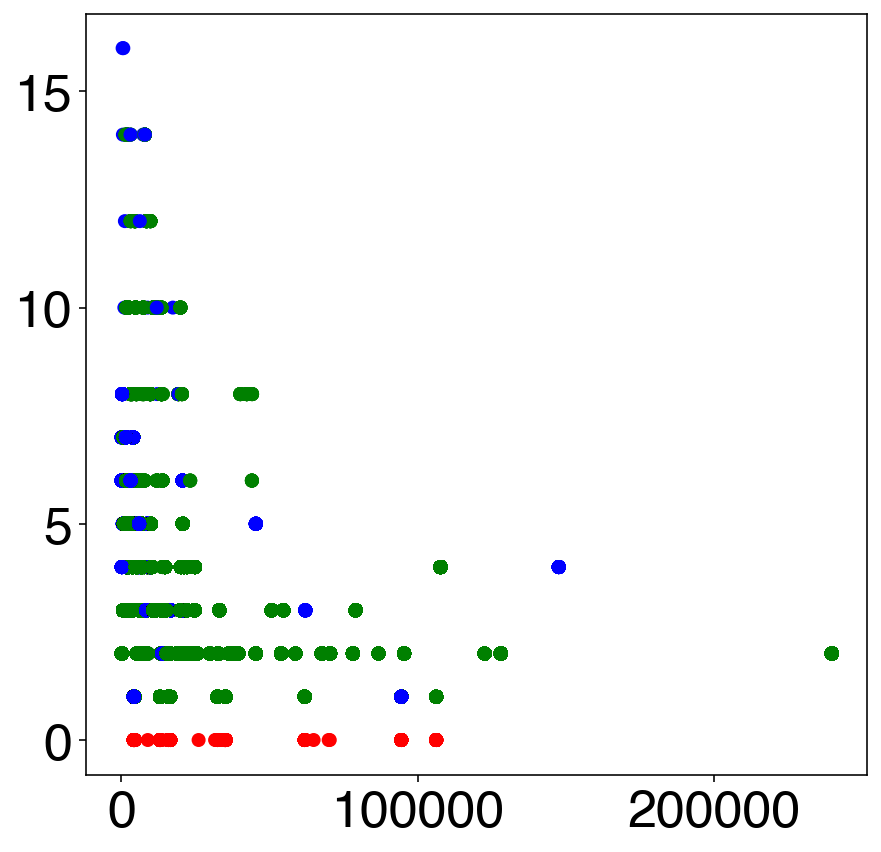

In [27]:
plt.scatter(
    wfdf["partial_planning_cost sum"],
    wfdf["partial_chosen_sequence_length sum"],
    c=list(
        wfdf["note item"].replace(
            {
                "A*\nAction level": "red",
                "A*\nScoping": "green",
                "A*\nFull": "blue",
                "BFS\nAction level": "red",
                "BFS\nScoping": "green",
                "BFS\nFull": "blue",
            }
        )
    ),
)
plt.plot();

### Bootstrapping function

In [28]:
# set random seed
random.seed(42)

In [58]:
def bootstrap(
    cond_df,
    column,
    stat_function=np.mean,
    CIs=[2.5, 97.5],
    iterations=1000,
    show_tqdm=True,
):
    """Bootstrap by choosing one attempt for each structure from the given df.
    The given df should only contain rows for the relevant algorithm/conditions.
    Returns mean and CI of mean."""
    measurements = np.zeros(iterations)
    world_masks = [cond_df["world item"] == w for w in cond_df["world item"].unique()]
    for i in tqdm(range(iterations), leave=False, disable=not show_tqdm):
        # sample one simulated run over all structures
        run = [random.choice(list(cond_df[w][column])) for w in world_masks]
        assert len(run) == len(world_masks)
        # save that run
        measurements[i] = stat_function(run)
    # compute mean and CI over measurements
    return np.mean(measurements), np.percentile(measurements, CIs)

## Agent level stats

We create `agent_df` with bootstrapped means and their CIs.

In [30]:
# which columns do we want in our bootstrapped agent_df?
columns = [
    "partial_planning_cost sum",
    "partial_planning_cost mean",
    "partial_solution_cost sum",
    "partial_solution_cost mean",
    "planning_cost sum",
    "planning_cost mean",
    "all_sequences_planning_cost sum",
    "all_sequences_planning_cost mean",
    "partial_chosen_sequence_length sum",
    "num_blocks",
]

# initialize df
# agent_df = pd.DataFrame(columns=pd.MultiIndex.from_product([columns,['mean','CI95']]))
rows = {}

for agent in wfdf["note item"].unique():
    new_row = {("note item", ""): agent}
    for column in columns:
        print(agent, column, end="\r")
        # bootstrap
        mean, CI = bootstrap(wfdf[wfdf["note item"] == agent], column)
        # insert into dictionary
        new_row[(column, "mean")] = mean
        new_row[(column, "CI95")] = np.array(CI)
    rows[agent] = new_row

# create df
agent_df = pd.DataFrame(rows).transpose()

A*


A*


A*


A*


A*


A*


A*


A*


A*


A*


BFS


BFS


BFS


BFS


BFS


BFS


BFS


BFS


BFS


BFS


BFS


BFS


BFS


BFS


BFS


BFS


BFS


BFS


BFS


BFS


A*


A*


A*


A*


A*


A*


A*


A*


A*


A*


BFS


BFS


BFS


BFS


BFS


BFS


BFS


BFS


BFS


BFS


A*


A*


A*


A*


A*


A*


A*


A*


A*


A*


And the same df, but for all runs to be able to check rate of success

In [32]:
# which columns do we want in our bootstrapped a_agent_df?
columns = ["world_float max"]

# initialize df
# agent_df = pd.DataFrame(columns=pd.MultiIndex.from_product([columns,['mean','CI95']]))
rows = {}

for agent in wfdf["note item"].unique():
    new_row = {("note item", ""): agent}
    for column in columns:
        print(agent, column, end="\r")
        # bootstrap
        mean, CI = bootstrap(fdf[fdf["note item"] == agent], column)
        # insert into dictionary
        new_row[(column, "mean")] = mean
        new_row[(column, "CI95")] = np.array(CI)
    rows[agent] = new_row

# create df
a_agent_df = pd.DataFrame(rows).transpose()

A*


BFS


BFS


A*


BFS


A*


In [31]:
agent_df

note item  \
                                       
A*\nScoping              A*\nScoping   
BFS\nScoping            BFS\nScoping   
BFS\nFull                  BFS\nFull   
A*\nFull                    A*\nFull   
BFS\nAction level  BFS\nAction level   
A*\nAction level    A*\nAction level   

                  partial_planning_cost sum  \
                                       mean   
A*\nScoping                         41909.8   
BFS\nScoping                        11698.1   
BFS\nFull                           3343.54   
A*\nFull                            27669.8   
BFS\nAction level                   22417.2   
A*\nAction level                      54176   

                                                            \
                                                      CI95   
A*\nScoping                     [35938.1875, 51382.465625]   
BFS\nScoping                   [6555.69375, 19088.2296875]   
BFS\nFull                    [3219.75, 3823.2953125000004]   
A*\nFull                              [27669.75, 27669.75]   
BFS\nAction level  [21755.14285714286, 26763.942857142858]   
A*\nAction level                        [54176.0, 54176.0]   

                  partial_planning_cost mean  \
                                        mean   
A*\nScoping                          22075.2   
BFS\nScoping                         6318.52   
BFS\nFull                            3219.75   
A*\nFull                             27669.8   
BFS\nAction level                    21755.1   
A*\nAction level                       54176   

                                                            \
                                                      CI95   
A*\nScoping           [17734.61484375, 29056.005989583333]   
BFS\nScoping       [3575.213333333333, 10361.906458333335]   
BFS\nFull                               [3219.75, 3219.75]   
A*\nFull                              [27669.75, 27669.75]   
BFS\nAction level   [21755.14285714286, 21755.14285714286]   
A*\nAction level                        [54176.0, 54176.0]   

                  partial_solution_cost sum  \
                                       mean   
A*\nScoping                         17608.6   
BFS\nScoping                        8313.38   
BFS\nFull                            2691.8   
A*\nFull                            12758.4   
BFS\nAction level                   22405.5   
A*\nAction level                    21271.4   

                                                            \
                                                      CI95   
A*\nScoping                    [14720.1875, 21386.4453125]   
BFS\nScoping                 [5586.9265625, 11632.4765625]   
BFS\nFull                           [2617.1875, 3217.8125]   
A*\nFull                          [12758.4375, 12758.4375]   
BFS\nAction level  [21755.14285714286, 26763.942857142858]   
A*\nAction level                        [21271.4, 21271.4]   

                  partial_solution_cost mean  \
                                        mean   
A*\nScoping                          8906.89   
BFS\nScoping                         4891.92   
BFS\nFull                            2617.19   
A*\nFull                             12758.4   
BFS\nAction level                    21755.1   
A*\nAction level                     21271.4   

                                                           \
                                                     CI95   
A*\nScoping               [7324.9625, 12245.676953124997]   
BFS\nScoping         [2469.872578125, 7793.2712239583325]   
BFS\nFull                          [2617.1875, 2617.1875]   
A*\nFull                         [12758.4375, 12758.4375]   
BFS\nAction level  [21755.14285714286, 21755.14285714286]   
A*\nAction level                       [21271.4, 21271.4]   

                  planning_cost sum  \
                               mean   
A*\nScoping                 42060.6   
BFS\nScoping                12646.6   
BFS\nFull                   3325.93   
A*\nFul

In [33]:
a_agent_df

note item  \
                                       
A*\nScoping              A*\nScoping   
BFS\nScoping            BFS\nScoping   
BFS\nFull                  BFS\nFull   
A*\nFull                    A*\nFull   
BFS\nAction level  BFS\nAction level   
A*\nAction level    A*\nAction level   

                  world_float max  \
                             mean   
A*\nScoping              0.857062   
BFS\nScoping              0.89225   
BFS\nFull                       1   
A*\nFull                        1   
BFS\nAction level          0.4375   
A*\nAction level           0.3125   

                                     
                               CI95  
A*\nScoping          [0.75, 0.9375]  
BFS\nScoping          [0.8125, 1.0]  
BFS\nFull                [1.0, 1.0]  
A*\nFull                 [1.0, 1.0]  
BFS\nAction level  [0.4375, 0.4375]  
A*\nAction level   [0.3125, 0.3125]

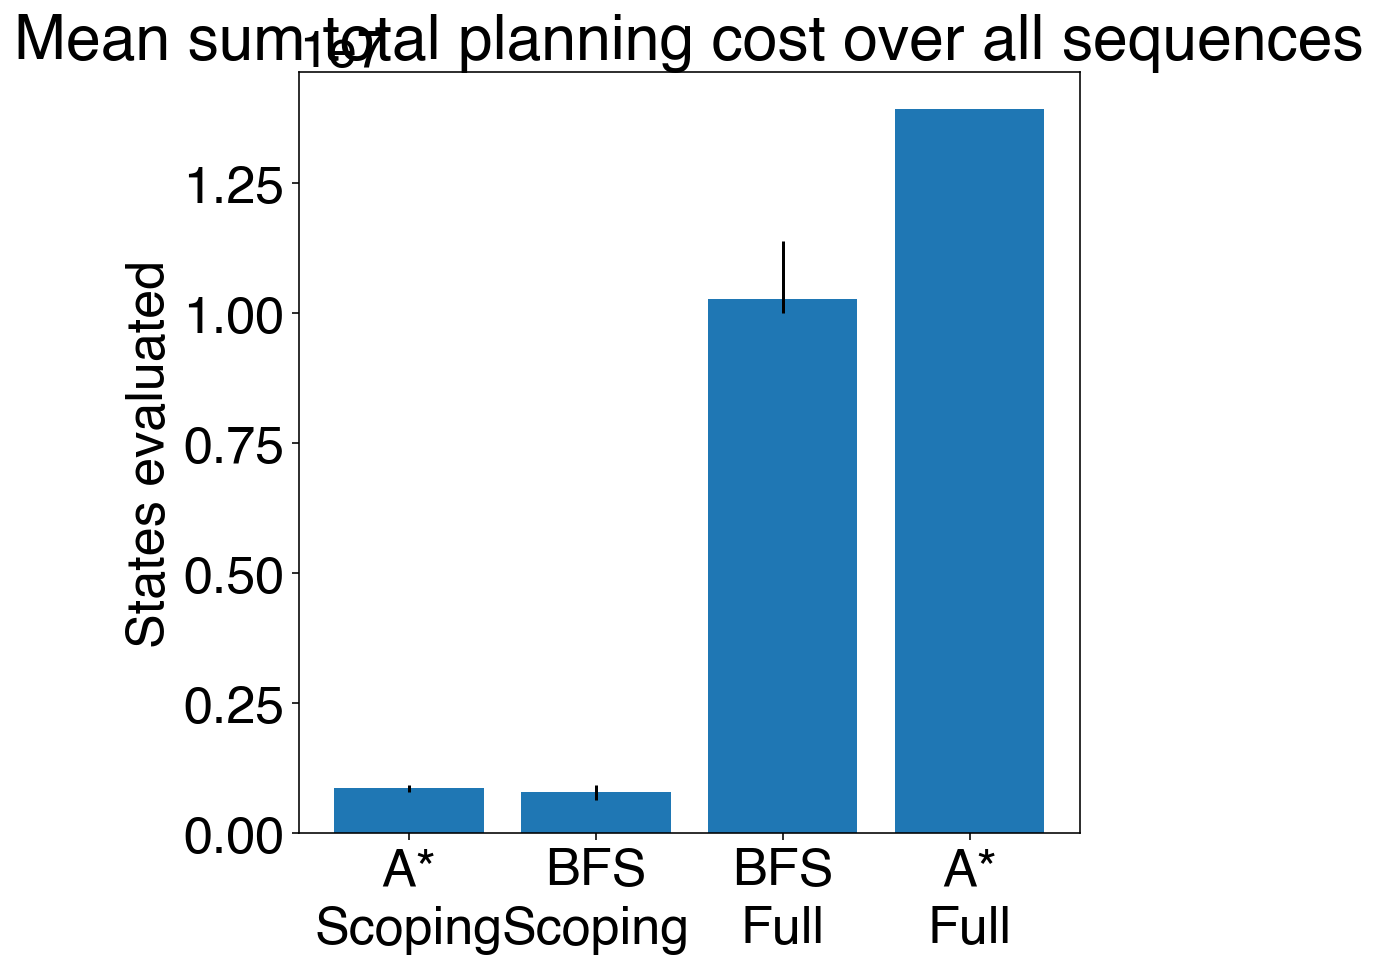

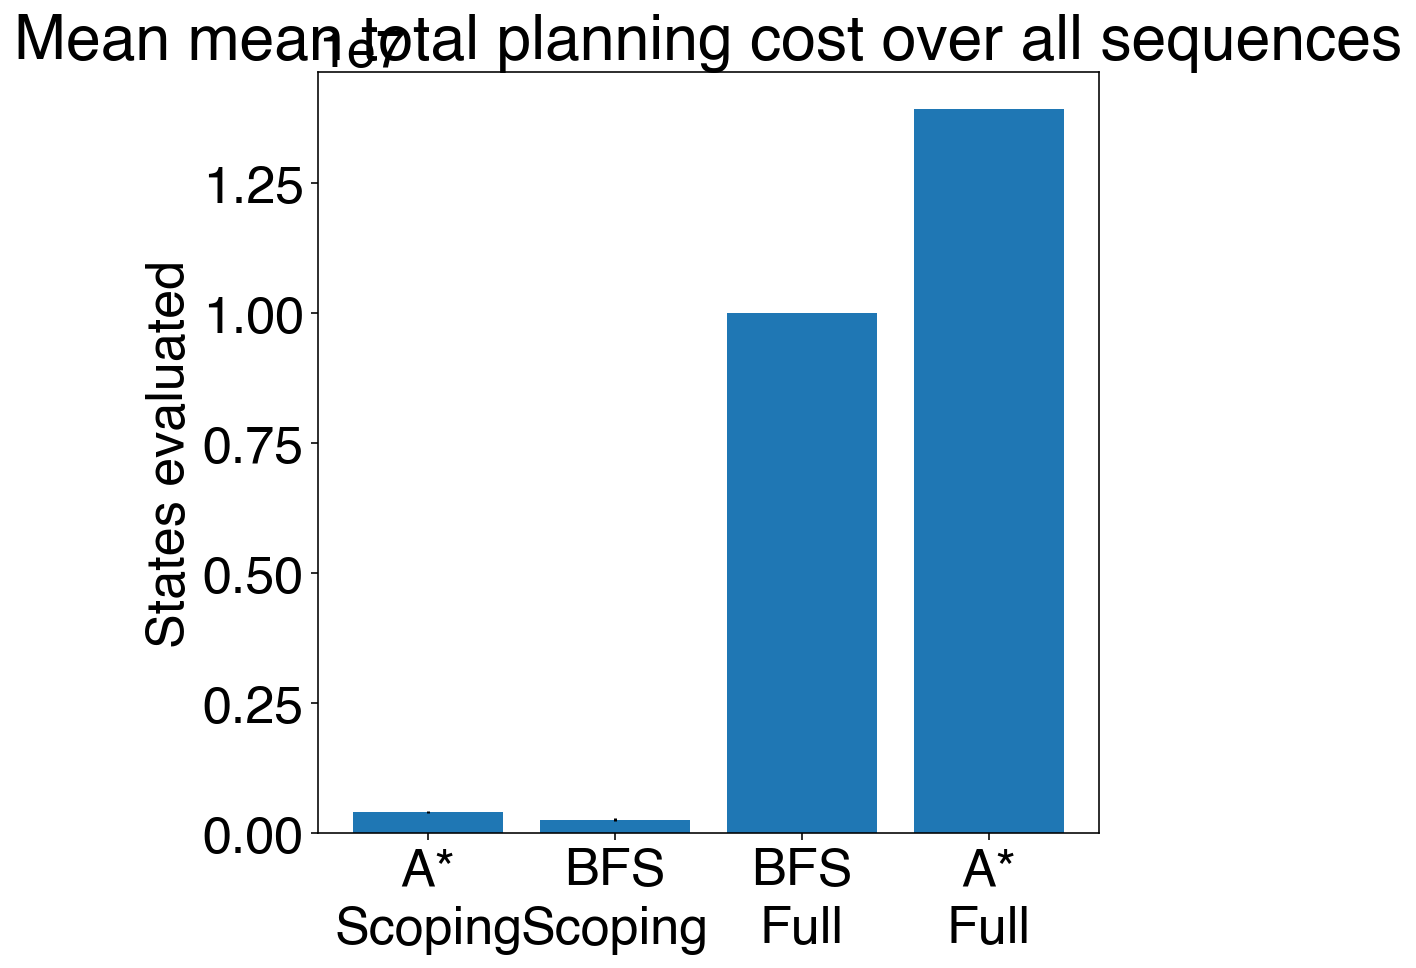

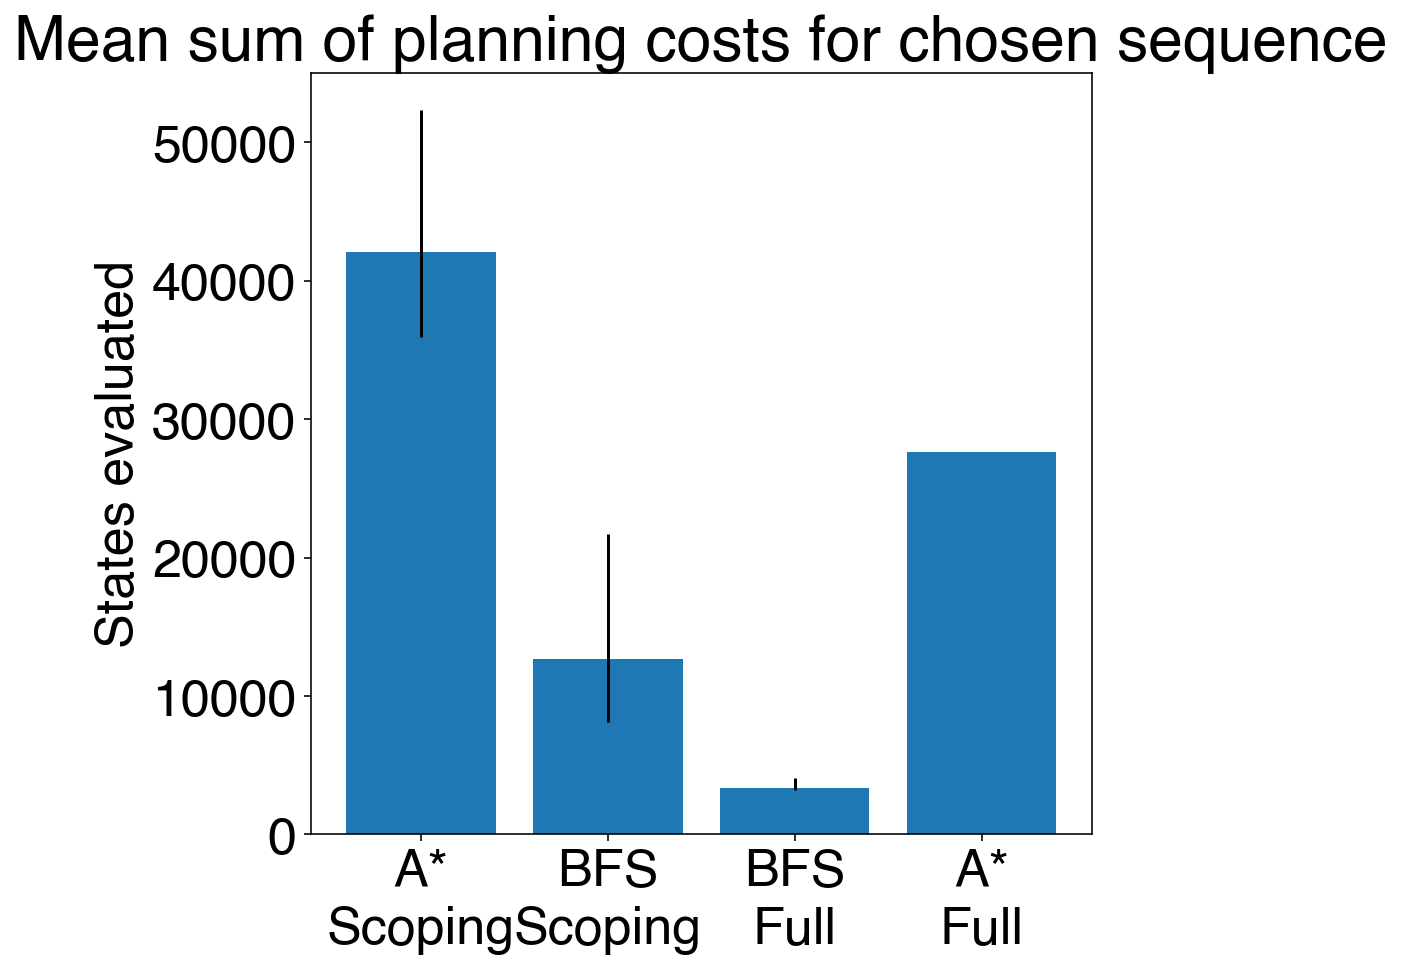

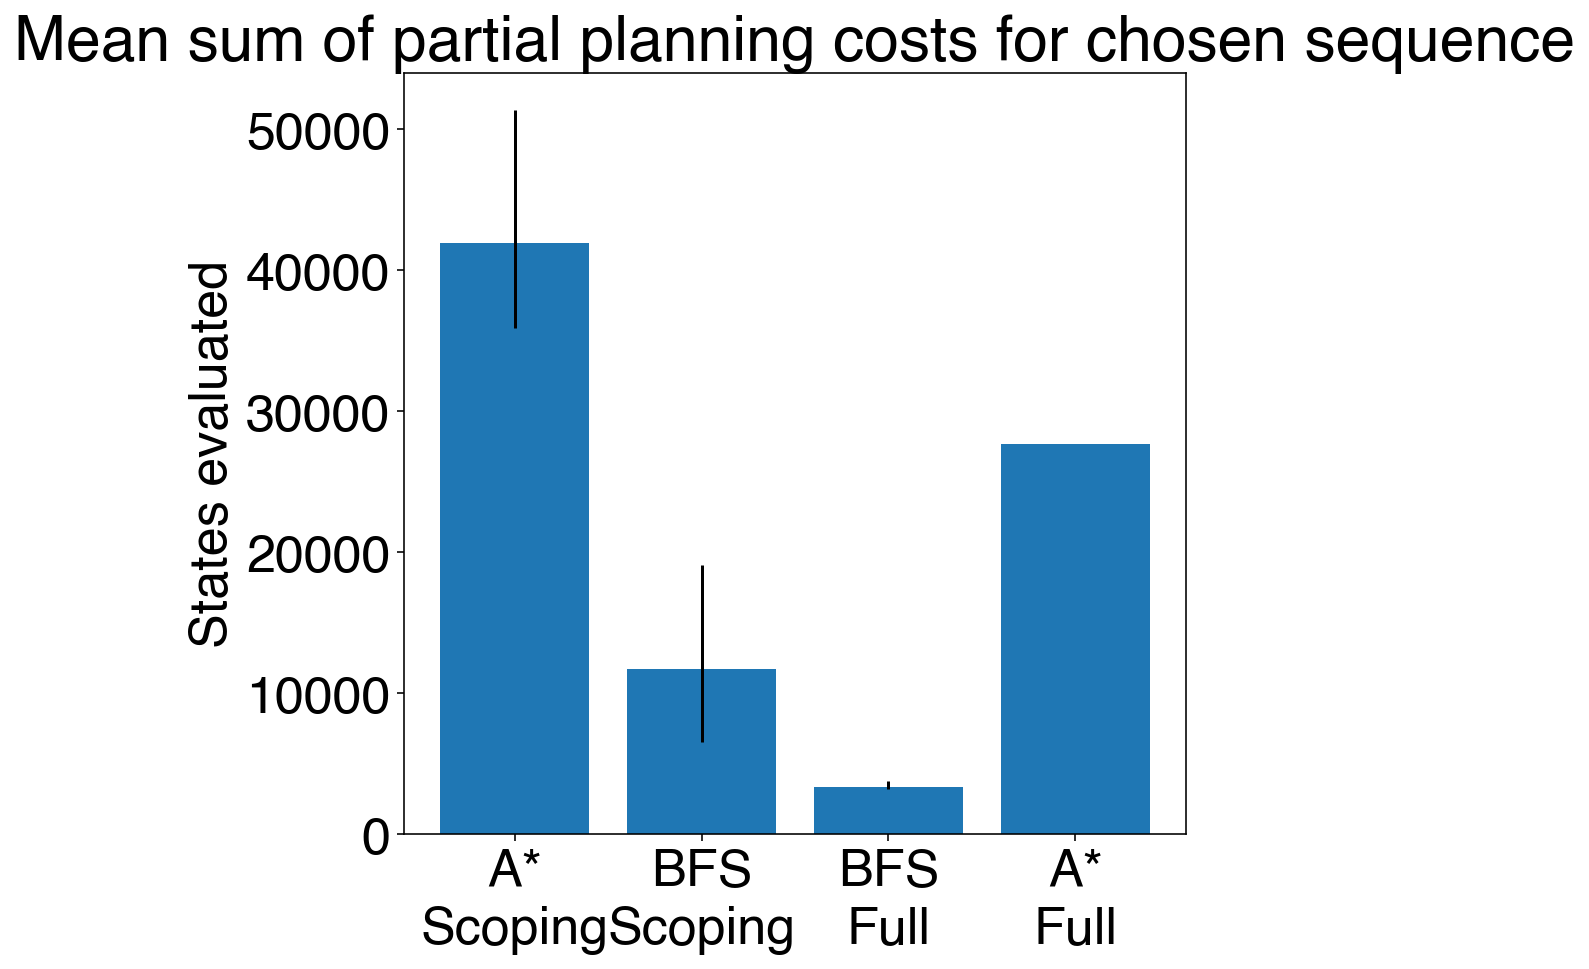

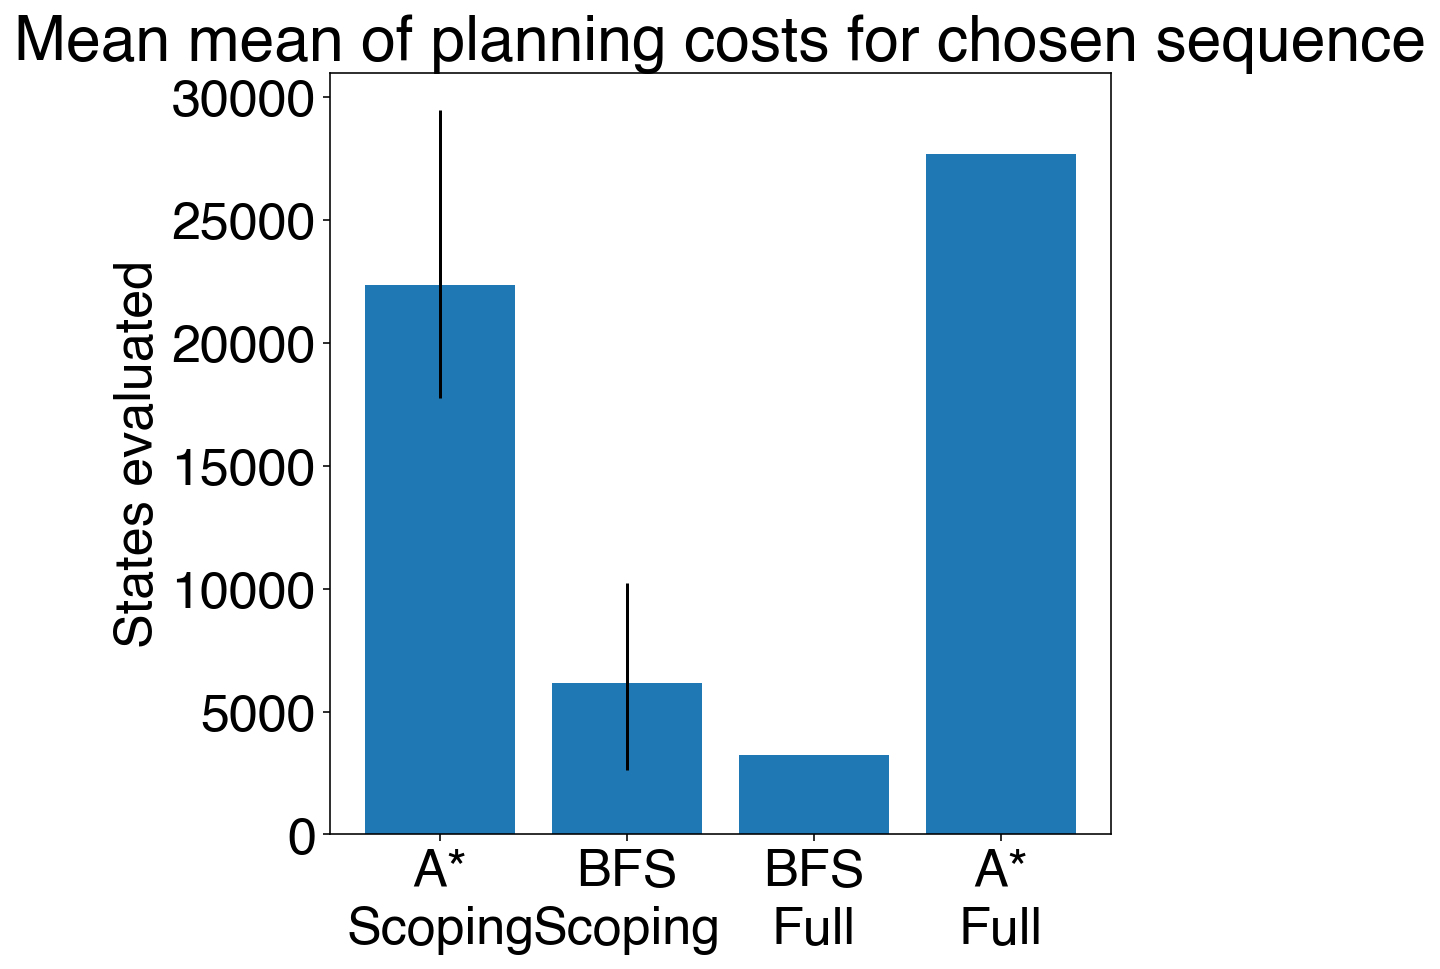

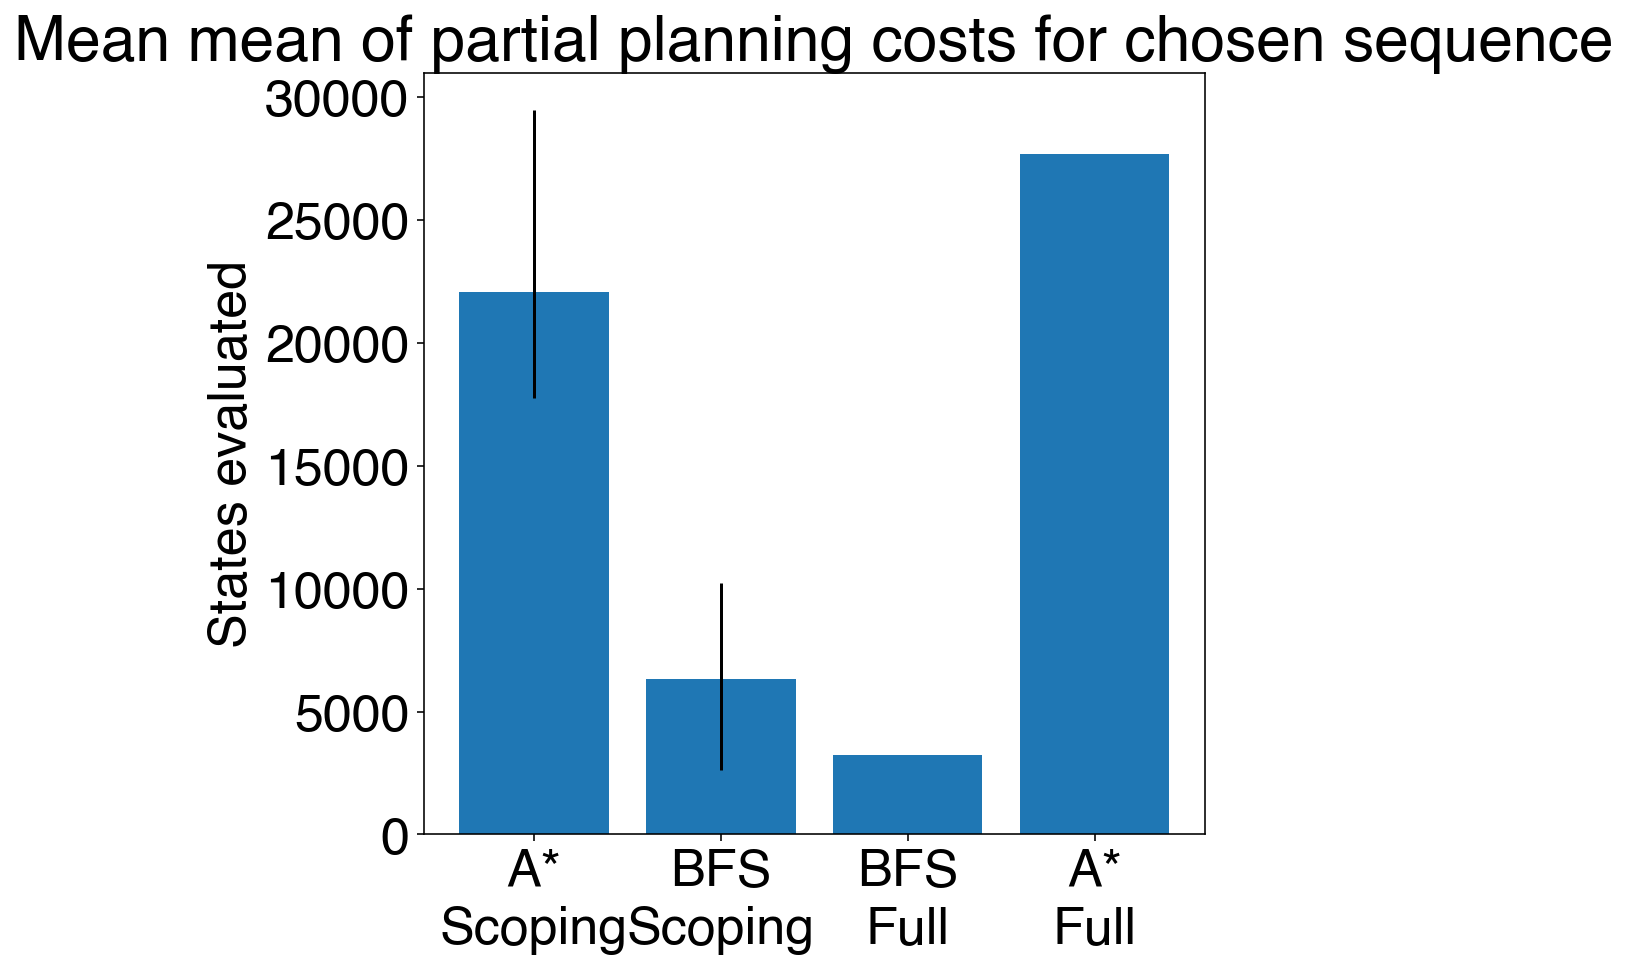

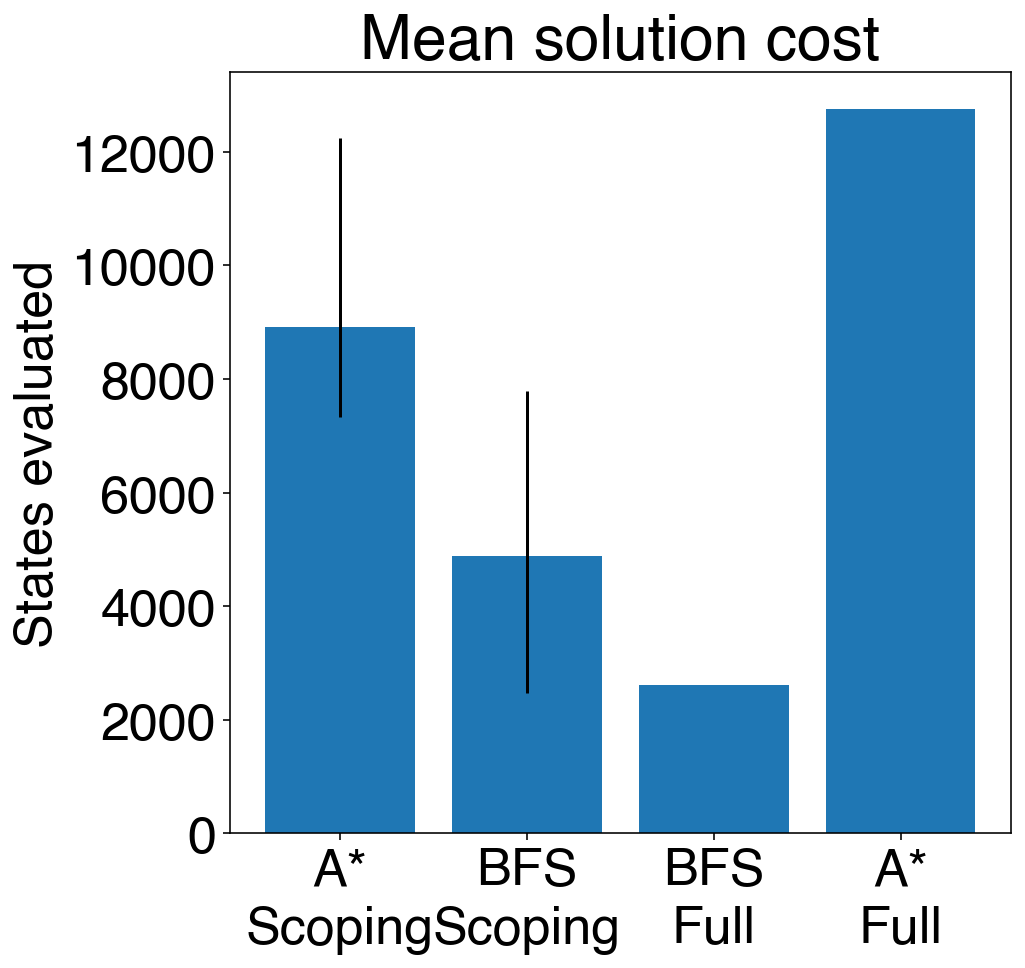

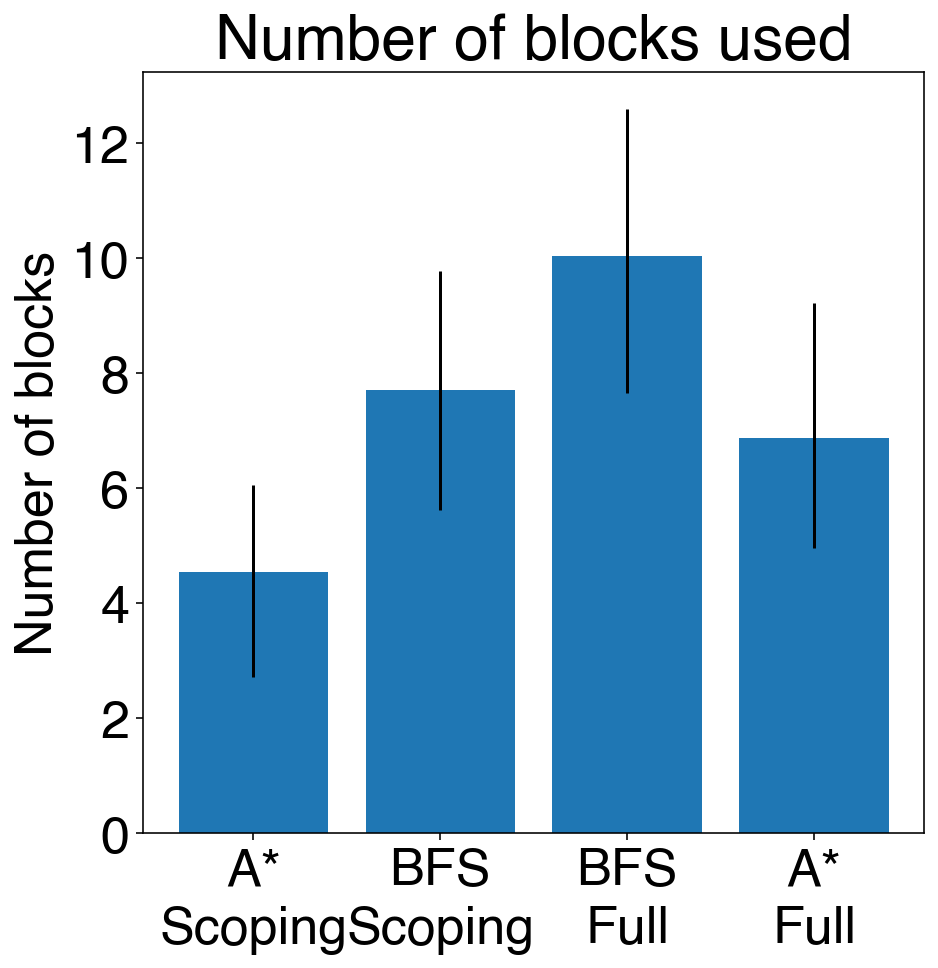

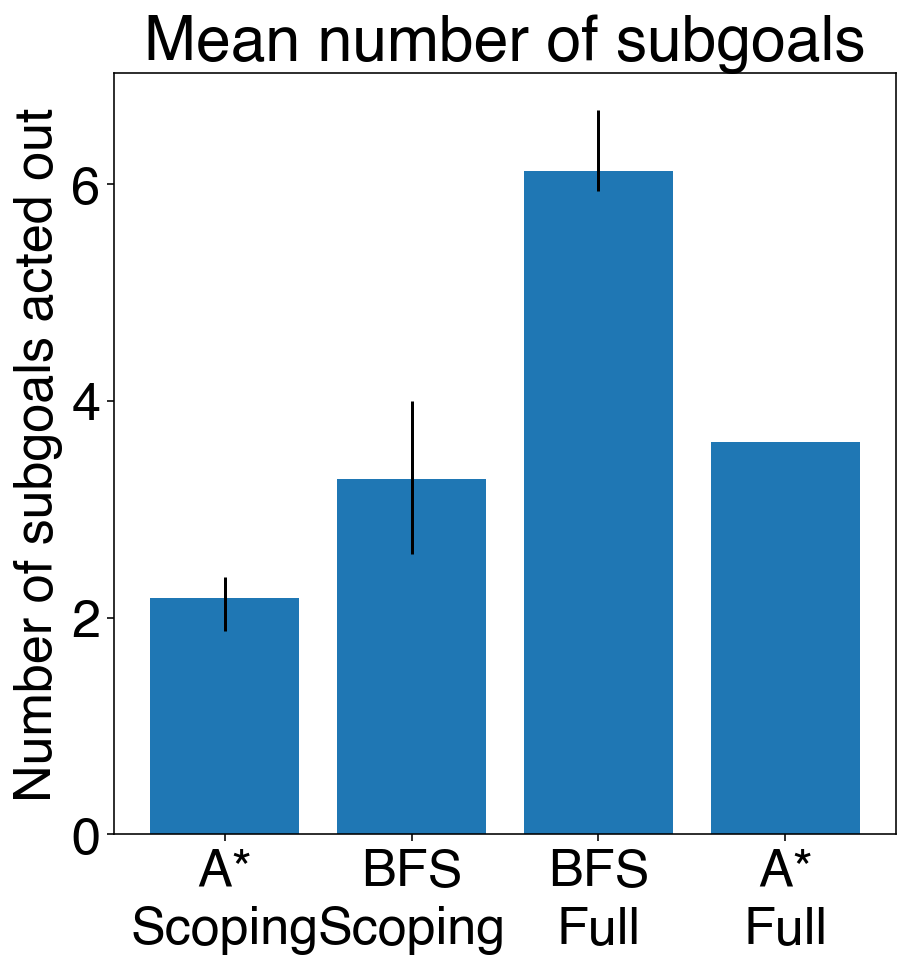

In [34]:
Ys = agent_df.dropna()["all_sequences_planning_cost sum"]["mean"]
CI95s = np.array(
    [list(x) for x in agent_df.dropna()["all_sequences_planning_cost sum"]["CI95"]]
).T
plt.bar(
    agent_df.dropna().index, Ys, yerr=np.array([abs(Ys - CI95s[0]), abs(Ys - CI95s[1])])
)
plt.title("Mean sum total planning cost over all sequences")
plt.ylabel("States evaluated")
# plt.yscale('log')
plt.show()

Ys = agent_df.dropna()["all_sequences_planning_cost mean"]["mean"]
CI95s = np.array(
    [list(x) for x in agent_df.dropna()["all_sequences_planning_cost mean"]["CI95"]]
).T
plt.bar(
    agent_df.dropna().index, Ys, yerr=np.array([abs(Ys - CI95s[0]), abs(Ys - CI95s[1])])
)
plt.title("Mean mean total planning cost over all sequences")
plt.ylabel("States evaluated")
# plt.yscale('log')
plt.show()

Ys = agent_df.dropna()["planning_cost sum"]["mean"]
CI95s = np.array([list(x) for x in agent_df.dropna()["planning_cost sum"]["CI95"]]).T
plt.bar(
    agent_df.dropna().index, Ys, yerr=np.array([abs(Ys - CI95s[0]), abs(Ys - CI95s[1])])
)
plt.title("Mean sum of planning costs for chosen sequence")
plt.ylabel("States evaluated")
# plt.yscale('log')
plt.show()

Ys = agent_df.dropna()["partial_planning_cost sum"]["mean"]
CI95s = np.array(
    [list(x) for x in agent_df.dropna()["partial_planning_cost sum"]["CI95"]]
).T
plt.bar(
    agent_df.dropna().index, Ys, yerr=np.array([abs(Ys - CI95s[0]), abs(Ys - CI95s[1])])
)
plt.title("Mean sum of partial planning costs for chosen sequence")
plt.ylabel("States evaluated")
# plt.yscale('log')
plt.show()

Ys = agent_df.dropna()["planning_cost mean"]["mean"]
CI95s = np.array([list(x) for x in agent_df.dropna()["planning_cost mean"]["CI95"]]).T
plt.bar(
    agent_df.dropna().index, Ys, yerr=np.array([abs(Ys - CI95s[0]), abs(Ys - CI95s[1])])
)
plt.title("Mean mean of planning costs for chosen sequence")
plt.ylabel("States evaluated")
# plt.yscale('log')
plt.show()

Ys = agent_df.dropna()["partial_planning_cost mean"]["mean"]
CI95s = np.array([list(x) for x in agent_df.dropna()["planning_cost mean"]["CI95"]]).T
plt.bar(
    agent_df.dropna().index, Ys, yerr=np.array([abs(Ys - CI95s[0]), abs(Ys - CI95s[1])])
)
plt.title("Mean mean of partial planning costs for chosen sequence")
plt.ylabel("States evaluated")
# plt.yscale('log')
plt.show()

Ys = agent_df.dropna()["partial_solution_cost mean"]["mean"]
CI95s = np.array(
    [list(x) for x in agent_df.dropna()["partial_solution_cost mean"]["CI95"]]
).T
plt.bar(
    agent_df.dropna().index, Ys, yerr=np.array([abs(Ys - CI95s[0]), abs(Ys - CI95s[1])])
)
plt.title("Mean solution cost")
plt.ylabel("States evaluated")
# plt.yscale('log')
plt.show()

Ys = agent_df.dropna()["num_blocks"]["mean"]
CI95s = np.array([list(x) for x in agent_df.dropna()["num_blocks"]["CI95"]]).T
plt.bar(
    agent_df.dropna().index, Ys, yerr=np.array([abs(Ys - CI95s[0]), abs(Ys - CI95s[1])])
)
plt.title("Number of blocks used")
plt.ylabel("Number of blocks")
# plt.yscale('log')
plt.show()

Ys = agent_df.dropna()["partial_chosen_sequence_length sum"]["mean"]
CI95s = np.array(
    [list(x) for x in agent_df.dropna()["partial_chosen_sequence_length sum"]["CI95"]]
).T
plt.bar(
    agent_df.dropna().index, Ys, yerr=np.array([abs(Ys - CI95s[0]), abs(Ys - CI95s[1])])
)
plt.title("Mean number of subgoals")
plt.ylabel("Number of subgoals acted out")
plt.savefig("../results/plots/lookahead_n_subgoals")
plt.show()

### Bar plot of success

Let's look at rate of success

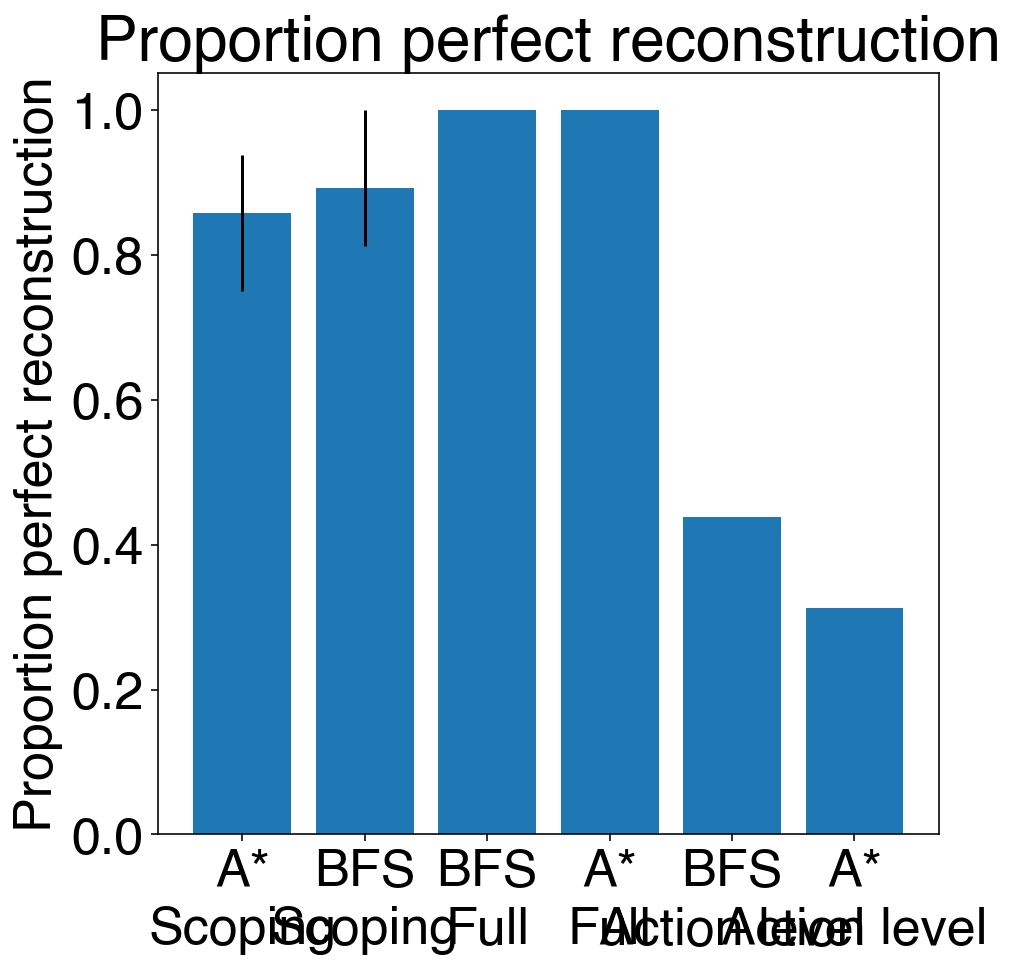

In [35]:
column = "world_float max"
CIs = np.array([list(x) for x in a_agent_df.dropna()[column]["CI95"]]).T
Xs = a_agent_df.dropna()[column]["mean"].index
Ys = a_agent_df.dropna()[column]["mean"]
Error = np.array([abs(Ys - CIs[0]), abs(Ys - CIs[1])])

plt.bar(Xs, Ys, yerr=Error)
plt.title("Proportion perfect reconstruction")
plt.ylabel("Proportion perfect reconstruction")
# plt.xlabel("Sequence length")
plt.show()

### Staggered bar plot of costs

In [37]:
# plotting offsets to group barplots
offsets = [0] * 3 + [0.5] * 3
barlocs = [a + b for a, b in zip(list(range(len(agent_df.index))), offsets)]

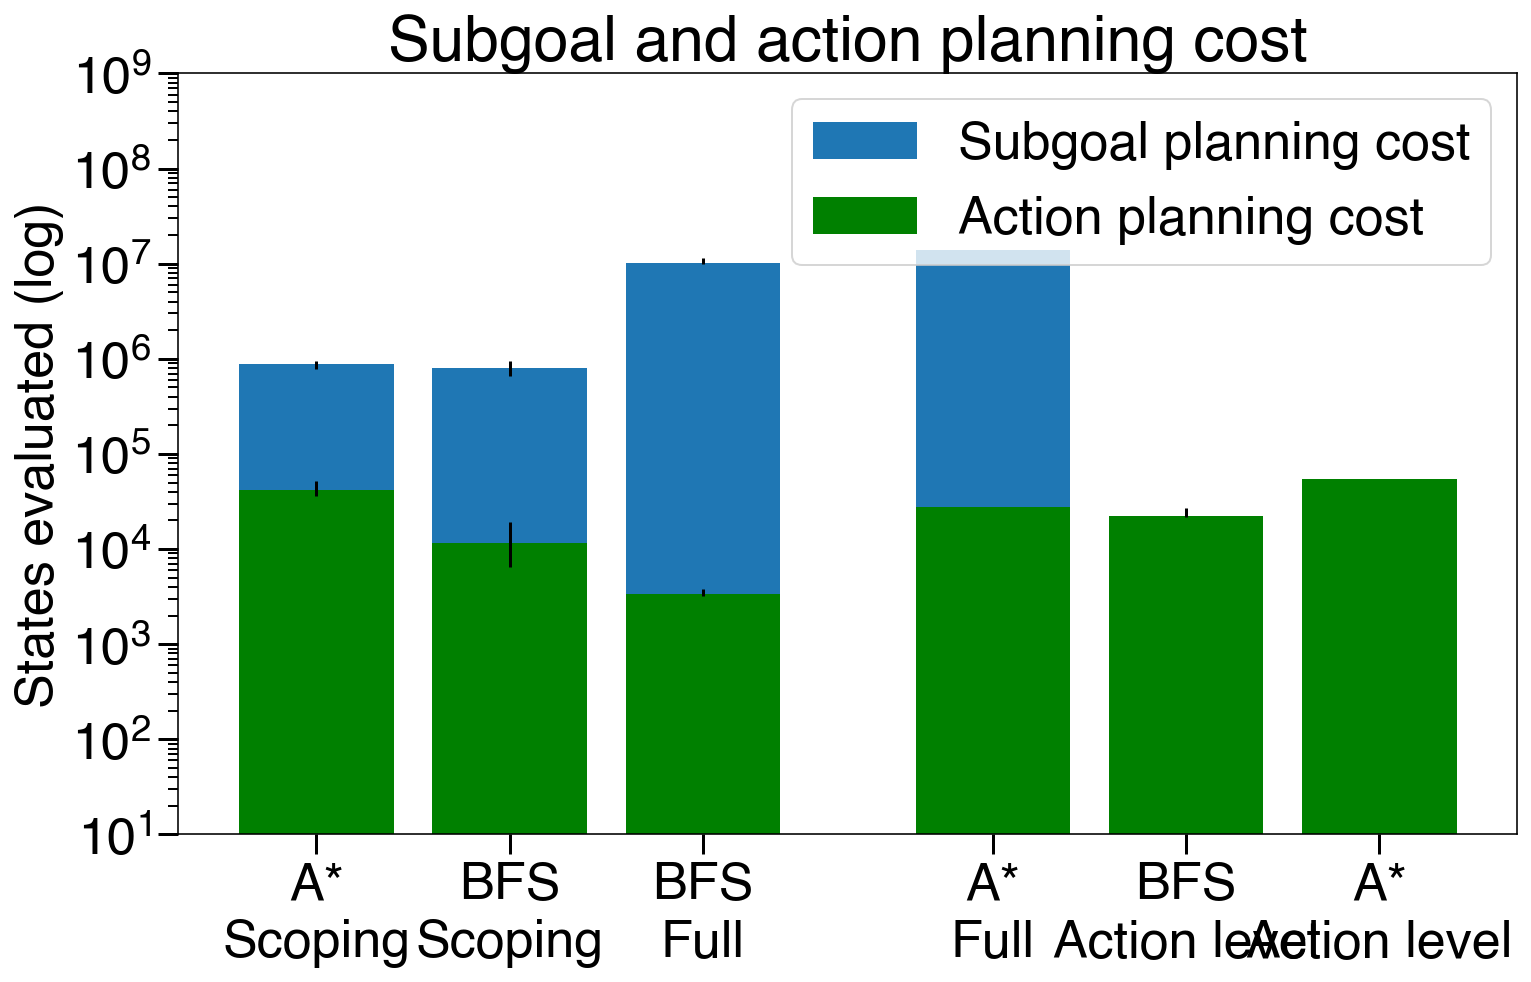

In [38]:
plt.figure(figsize=(12, 7))

Y1s = agent_df["all_sequences_planning_cost sum"]["mean"]
CI195s = np.array(
    [list(x) for x in agent_df["all_sequences_planning_cost sum"]["CI95"]]
).T
tot = plt.bar(barlocs, Y1s, yerr=np.array([abs(Y1s - CI195s[0]), abs(Y1s - CI195s[1])]))

Y1s = agent_df["partial_planning_cost sum"]["mean"]
CI195s = np.array([list(x) for x in agent_df["partial_planning_cost sum"]["CI95"]]).T
par = plt.bar(
    barlocs,
    Y1s,
    yerr=np.array([abs(Y1s - CI195s[0]), abs(Y1s - CI195s[1])]),
    color="green",
)

plt.title("Subgoal and action planning cost")
plt.legend((tot[0], par[0]), ("Subgoal planning cost", "Action planning cost"))
plt.ylabel("States evaluated (log)")
plt.yscale("log")
plt.ylim(1)

# set y ticks
ax = plt.gca()
y_major = matplotlib.ticker.LogLocator(base=10.0, numticks=10)
ax.yaxis.set_major_locator(y_major)
y_minor = matplotlib.ticker.LogLocator(
    base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=10
)
ax.yaxis.set_minor_locator(y_minor)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis="both", which="minor", width=1, length=5)
ax.tick_params(axis="both", which="major", width=1.5, length=10)

plt.ylim(10**1, 10**9)
plt.xticks(barlocs, agent_df.index)
plt.show()

#### Without action planning costs

In [43]:
sg_agent_df = agent_df.loc[~agent_df.index.str.contains("Action level")]

In [44]:
# plotting offsets to group barplots
sg_offsets = [0] * 2 + [0.5] * 2
sg_barlocs = [a + b for a, b in zip(list(range(len(sg_agent_df.index))), sg_offsets)]

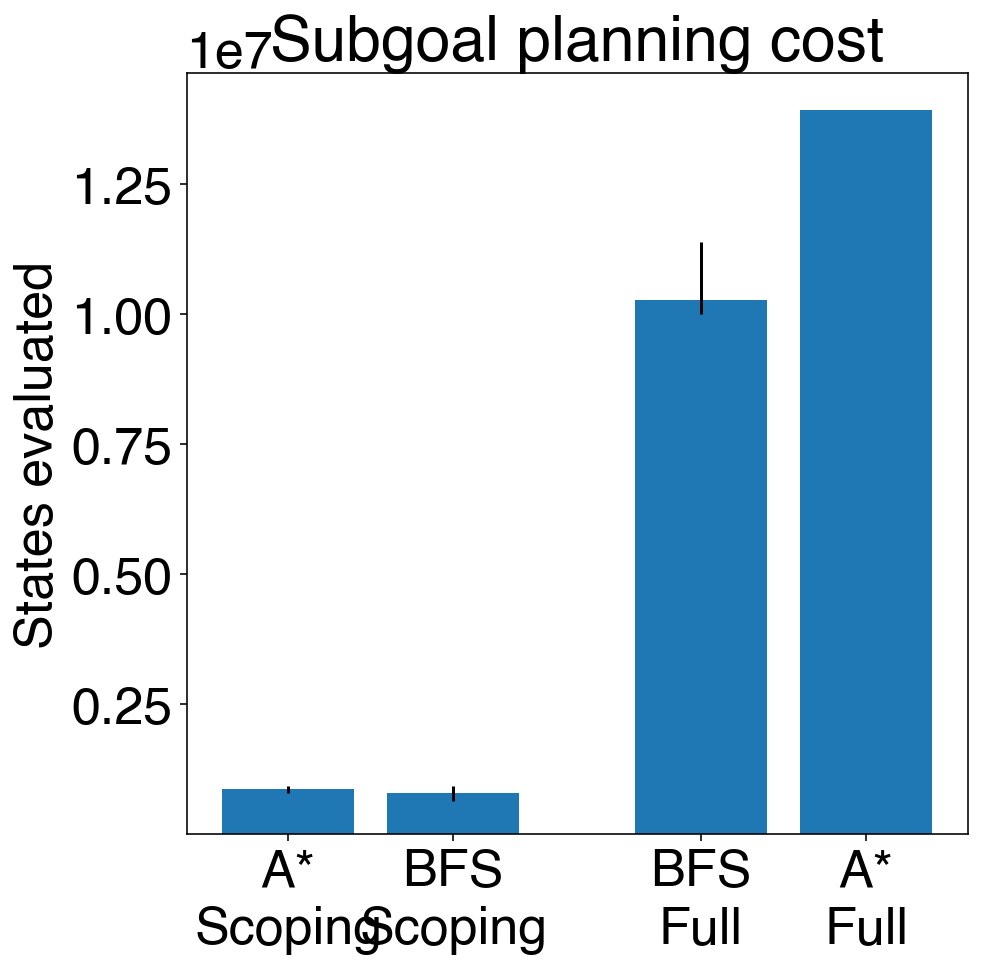

In [45]:
plt.figure(figsize=(7, 7))

Y1s = sg_agent_df["all_sequences_planning_cost sum"]["mean"]
CI195s = np.array(
    [list(x) for x in sg_agent_df["all_sequences_planning_cost sum"]["CI95"]]
).T
tot = plt.bar(
    sg_barlocs, Y1s, yerr=np.array([abs(Y1s - CI195s[0]), abs(Y1s - CI195s[1])])
)

plt.title("Subgoal planning cost")
# plt.legend((tot[0], par[0]), ('Subgoal planning cost', 'Action planning cost'))
plt.ylabel("States evaluated")
plt.ylim(1)

# set y ticks
# plt.yscale('log')
# ax = plt.gca()
# y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 10)
# ax.yaxis.set_major_locator(y_major)
# y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
# ax.yaxis.set_minor_locator(y_minor)
# ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
# ax.tick_params(axis='both', which='minor', width=1, length=5)
# ax.tick_params(axis='both', which='major', width=1.5, length=10)

# plt.ylim(10**1,10**9)
plt.xticks(sg_barlocs, sg_agent_df.index)
plt.savefig("../results/plots/subgoal_cost_bar_plot.png")
plt.show()

### Stats on success and cost 💎

#### Success

In [80]:
a_agent_df

note item  \
                                       
A*\nScoping              A*\nScoping   
BFS\nScoping            BFS\nScoping   
BFS\nFull                  BFS\nFull   
A*\nFull                    A*\nFull   
BFS\nAction level  BFS\nAction level   
A*\nAction level    A*\nAction level   

                  world_float max  \
                             mean   
A*\nScoping              0.857062   
BFS\nScoping              0.89225   
BFS\nFull                       1   
A*\nFull                        1   
BFS\nAction level          0.4375   
A*\nAction level           0.3125   

                                     
                               CI95  
A*\nScoping          [0.75, 0.9375]  
BFS\nScoping          [0.8125, 1.0]  
BFS\nFull                [1.0, 1.0]  
A*\nFull                 [1.0, 1.0]  
BFS\nAction level  [0.4375, 0.4375]  
A*\nAction level   [0.3125, 0.3125]

#### Cost

In [81]:
agent_df

note item  \
                                       
A*\nScoping              A*\nScoping   
BFS\nScoping            BFS\nScoping   
BFS\nFull                  BFS\nFull   
A*\nFull                    A*\nFull   
BFS\nAction level  BFS\nAction level   
A*\nAction level    A*\nAction level   

                  partial_planning_cost sum  \
                                       mean   
A*\nScoping                         41909.8   
BFS\nScoping                        11698.1   
BFS\nFull                           3343.54   
A*\nFull                            27669.8   
BFS\nAction level                   22417.2   
A*\nAction level                      54176   

                                                            \
                                                      CI95   
A*\nScoping                     [35938.1875, 51382.465625]   
BFS\nScoping                   [6555.69375, 19088.2296875]   
BFS\nFull                    [3219.75, 3823.2953125000004]   
A*\nFull                              [27669.75, 27669.75]   
BFS\nAction level  [21755.14285714286, 26763.942857142858]   
A*\nAction level                        [54176.0, 54176.0]   

                  partial_planning_cost mean  \
                                        mean   
A*\nScoping                          22075.2   
BFS\nScoping                         6318.52   
BFS\nFull                            3219.75   
A*\nFull                             27669.8   
BFS\nAction level                    21755.1   
A*\nAction level                       54176   

                                                            \
                                                      CI95   
A*\nScoping           [17734.61484375, 29056.005989583333]   
BFS\nScoping       [3575.213333333333, 10361.906458333335]   
BFS\nFull                               [3219.75, 3219.75]   
A*\nFull                              [27669.75, 27669.75]   
BFS\nAction level   [21755.14285714286, 21755.14285714286]   
A*\nAction level                        [54176.0, 54176.0]   

                  partial_solution_cost sum  \
                                       mean   
A*\nScoping                         17608.6   
BFS\nScoping                        8313.38   
BFS\nFull                            2691.8   
A*\nFull                            12758.4   
BFS\nAction level                   22405.5   
A*\nAction level                    21271.4   

                                                            \
                                                      CI95   
A*\nScoping                    [14720.1875, 21386.4453125]   
BFS\nScoping                 [5586.9265625, 11632.4765625]   
BFS\nFull                           [2617.1875, 3217.8125]   
A*\nFull                          [12758.4375, 12758.4375]   
BFS\nAction level  [21755.14285714286, 26763.942857142858]   
A*\nAction level                        [21271.4, 21271.4]   

                  partial_solution_cost mean  \
                                        mean   
A*\nScoping                          8906.89   
BFS\nScoping                         4891.92   
BFS\nFull                            2617.19   
A*\nFull                             12758.4   
BFS\nAction level                    21755.1   
A*\nAction level                     21271.4   

                                                           \
                                                     CI95   
A*\nScoping               [7324.9625, 12245.676953124997]   
BFS\nScoping         [2469.872578125, 7793.2712239583325]   
BFS\nFull                          [2617.1875, 2617.1875]   
A*\nFull                         [12758.4375, 12758.4375]   
BFS\nAction level  [21755.14285714286, 21755.14285714286]   
A*\nAction level                       [21271.4, 21271.4]   

                  planning_cost sum  \
                               mean   
A*\nScoping                 42060.6   
BFS\nScoping                12646.6   
BFS\nFull                   3325.93   
A*\nFul

### Bootstrapped differences between agents

#### Bootstrapping difference function

In [388]:
def bootstrap_difference(
    A_df, B_df, column, stat_function=np.mean, CIs=[2.5, 97.5], iterations=1000
):
    """Bootstrap by choosing one attempt for each structure from the given df for each A and B, then taking the difference.
    The given df should only contain rows for the relevant algorithm/conditions.
    Returns mean and CI of mean."""
    measurements = np.zeros(iterations)
    A_world_masks = [
        A_df["world item"] == w for w in sorted(A_df["world item"].unique())
    ]
    B_world_masks = [
        B_df["world item"] == w for w in sorted(B_df["world item"].unique())
    ]
    for i in tqdm(range(iterations), leave=False):
        # sample one simulated run over all structures
        runA = [random.choice(list(A_df[w][column])) for w in A_world_masks]
        runB = [random.choice(list(B_df[w][column])) for w in B_world_masks]
        # compute differences between the means of two runs
        measurements[i] = stat_function(runA) - stat_function(runB)

    # compute mean and CI over measurements
    p = np.sum(np.array(measurements) < 0) / (len(measurements) * 2)  # p value
    return np.mean(measurements), np.percentile(measurements, CIs), p

#### Scoping vs Full
The **action cost** of subgoal planning is lower than the **cost** of full planning. 

One sided Welsh t test:

In [389]:
for agent in ["BFS", "A*"]:
    print(agent)
    a = wfdf[wfdf["note item"] == agent + "\nScoping"]["partial_planning_cost sum"]
    b = wfdf[wfdf["note item"] == agent + "\nFull"]["partial_planning_cost sum"]
    tStat, pValue = stats.ttest_ind(
        a, b, equal_var=False
    )  # run independent sample T-Test
    pValue = pValue / 2  # we're doing a one sided test here
    print(
        "P-Value:{0} T-Statistic:{1}, DF: {2}".format(
            pValue, tStat, len(a) + len(b) - 2
        )
    )  # print the P-Value and the T-Statistic

BFS
P-Value:2.5770511829248398e-278 T-Statistic:55.260782026469855, DF: 46302
A*
P-Value:0.017717107499680532 T-Statistic:2.108853923613518, DF: 44158


Bootstrapped difference:

In [390]:
# bootstrapped pairwise
column = "partial_planning_cost sum"
a = "Scoping"
b = "Full"
for agent in ["BFS", "A*"]:
    mean, CI, p = bootstrap_difference(
        wfdf[wfdf["note item"] == agent + "\n" + a],
        wfdf[wfdf["note item"] == agent + "\n" + b],
        column,
    )
    print("————————————————————————")
    print(agent, column)
    print("mean difference:", mean, " p:", p, " CI:", CI)

————————————————————————
BFS partial_planning_cost sum
mean difference: 9107.2985625  p: 0.0  CI: [ 3767.0765625 17013.9140625]


————————————————————————
A* partial_planning_cost sum
mean difference: 14842.3570625  p: 0.0  CI: [ 8268.4375  25458.18125]


The **subgoal cost** of scoping planning is lower than the **subgoal cost** of full planning. 

One sided Welsh t test:

In [391]:
for agent in ["BFS", "A*"]:
    print(agent)
    a = wfdf[wfdf["note item"] == agent + "\nScoping"][
        "all_sequences_planning_cost sum"
    ]
    b = wfdf[wfdf["note item"] == agent + "\nFull"]["all_sequences_planning_cost sum"]
    tStat, pValue = stats.ttest_ind(
        a, b, equal_var=False
    )  # run independent sample T-Test
    pValue = pValue / 2  # we're doing a one sided test here
    print(
        "P-Value:{0} T-Statistic:{1}, DF: {2}".format(
            pValue, tStat, len(a) + len(b) - 2
        )
    )  # print the P-Value and the T-Statistic

BFS
P-Value:1.0056508184489856e-226 T-Statistic:-57.82693375802507, DF: 46302
A*
P-Value:0.0 T-Statistic:-102.71386743680424, DF: 44158


Bootstrapped difference:

In [392]:
# bootstrapped pairwise
column = "all_sequences_planning_cost sum"
a = "Scoping"
b = "Full"
for agent in ["BFS", "A*"]:
    mean, CI, p = bootstrap_difference(
        wfdf[wfdf["note item"] == agent + "\n" + a],
        wfdf[wfdf["note item"] == agent + "\n" + b],
        column,
    )
    print("————————————————————————")
    print(agent, column)
    print("mean difference:", mean, " p:", p, " CI:", CI)

————————————————————————
BFS all_sequences_planning_cost sum
mean difference: -9520776.05025  p: 0.5  CI: [-10651227.7734375  -9087049.7359375]


————————————————————————
A* all_sequences_planning_cost sum
mean difference: -13060848.38225  p: 0.5  CI: [-13161415.6578125 -12992823.25     ]


The success of **scoping** planning is lower than the **success** of full planning:

One sided Welsh t test:

In [393]:
for agent in ["BFS", "A*"]:
    print(agent)
    a = fdf[fdf["note item"] == agent + "\nScoping"]["world_float max"]
    b = fdf[fdf["note item"] == agent + "\nFull"]["world_float max"]
    tStat, pValue = stats.ttest_ind(
        a, b, equal_var=False
    )  # run independent sample T-Test
    pValue = pValue / 2  # we're doing a one sided test here
    print(
        "P-Value:{0} T-Statistic:{1}, DF: {2}".format(
            pValue, tStat, len(a) + len(b) - 2
        )
    )  # print the P-Value and the T-Statistic

BFS
P-Value:0.0 T-Statistic:-77.75964598476351, DF: 51710
A*
P-Value:0.0 T-Statistic:-94.11948791756731, DF: 51710


Bootstrapped difference:

In [394]:
# bootstrapped pairwise
column = "world_float max"
a = "Scoping"
b = "Full"
for agent in ["BFS", "A*"]:
    mean, CI, p = bootstrap_difference(
        fdf[fdf["note item"] == agent + "\n" + a],
        fdf[fdf["note item"] == agent + "\n" + b],
        column,
    )
    print("————————————————————————")
    print(agent, column)
    print("mean difference:", mean, " p:", p, " CI:", CI)

————————————————————————
BFS world_float max
mean difference: -0.104  p: 0.4585  CI: [-0.1875  0.    ]


————————————————————————
A* world_float max
mean difference: -0.145375  p: 0.4925  CI: [-0.25   -0.0625]


Scoping uses more blocks than full

In [395]:
# bootstrapped pairwise
column = "num_blocks"
a = "Scoping"
b = "Full"
for agent in ["BFS", "A*"]:
    mean, CI, p = bootstrap_difference(
        fdf[fdf["note item"] == agent + "\n" + a],
        fdf[fdf["note item"] == agent + "\n" + b],
        column,
    )
    print("————————————————————————")
    print(agent, column)
    print("mean difference:", mean, " p:", p, " CI:", CI)

————————————————————————
BFS num_blocks
mean difference: -2.2724375  p: 0.436  CI: [-6.0640625  1.6890625]


————————————————————————
A* num_blocks
mean difference: -3.0954375  p: 0.485  CI: [-6.1875e+00  1.5625e-03]


but fewer than action-level

In [401]:
# bootstrapped pairwise
column = "num_blocks"
a = "Scoping"
b = "Action level"
for agent in ["BFS", "A*"]:
    mean, CI, p = bootstrap_difference(
        fdf[fdf["note item"] == agent + "\n" + a],
        fdf[fdf["note item"] == agent + "\n" + b],
        column,
    )
    print("————————————————————————")
    print(agent, column)
    print("mean difference:", mean, " p:", p, " CI:", CI)

————————————————————————
BFS num_blocks
mean difference: 5.3305625  p: 0.0  CI: [2.6875 7.875 ]


————————————————————————
A* num_blocks
mean difference: 1.4135  p: 0.027  CI: [-0.25    3.3125]


#### Full vs action level
The **action cost** of full planning is lower than the **cost** of no subgoal planning. 

One sided Welsh t test:

In [396]:
for agent in ["BFS", "A*"]:
    print(agent)
    a = wfdf[wfdf["note item"] == agent + "\nAction level"]["partial_planning_cost sum"]
    b = wfdf[wfdf["note item"] == agent + "\nFull"]["partial_planning_cost sum"]
    tStat, pValue = stats.ttest_ind(
        a, b, equal_var=False
    )  # run independent sample T-Test
    pValue = pValue / 2  # we're doing a one sided test here
    print(
        "P-Value:{0} T-Statistic:{1}, DF: {2}".format(
            pValue, tStat, len(a) + len(b) - 2
        )
    )  # print the P-Value and the T-Statistic

BFS
P-Value:5.031353646618974e-61 T-Statistic:22.545446988781475, DF: 734
A*
P-Value:2.7917660319175212e-11 T-Statistic:6.85394545048013, DF: 670


Bootstrapped difference:

In [397]:
# bootstrapped pairwise
column = "partial_planning_cost sum"
a = "Action level"
b = "Full"
for agent in ["BFS", "A*"]:
    mean, CI, p = bootstrap_difference(
        wfdf[wfdf["note item"] == agent + "\n" + a],
        wfdf[wfdf["note item"] == agent + "\n" + b],
        column,
    )
    print("————————————————————————")
    print(agent, column)
    print("mean difference:", mean, " p:", p, " CI:", CI)

————————————————————————
BFS partial_planning_cost sum
mean difference: 19089.359830357145  p: 0.0  CI: [17980.19598214 23531.05      ]


————————————————————————
A* partial_planning_cost sum
mean difference: 26506.25  p: 0.0  CI: [26506.25 26506.25]


The success of **full subgoal** planning is lower than the **success** of no subgoal planning:

One sided Welsh t test:

In [398]:
for agent in ["BFS", "A*"]:
    print(agent)
    a = fdf[fdf["note item"] == agent + "\nAction level"]["world_float max"]
    b = fdf[fdf["note item"] == agent + "\nFull"]["world_float max"]
    tStat, pValue = stats.ttest_ind(
        a, b, equal_var=False
    )  # run independent sample T-Test
    pValue = pValue / 2  # we're doing a one sided test here
    print(
        "P-Value:{0} T-Statistic:{1}, DF: {2}".format(
            pValue, tStat, len(a) + len(b) - 2
        )
    )  # print the P-Value and the T-Statistic

BFS
P-Value:4.37183287065689e-94 T-Statistic:-25.632011235952593, DF: 1022
A*
P-Value:1.8266164635445895e-131 T-Statistic:-33.529091845738975, DF: 1022


Bootstrapped difference:

In [399]:
# bootstrapped pairwise
column = "world_float max"
a = "Action level"
b = "Full"
for agent in ["BFS", "A*"]:
    mean, CI, p = bootstrap_difference(
        fdf[fdf["note item"] == agent + "\n" + a],
        fdf[fdf["note item"] == agent + "\n" + b],
        column,
    )
    print("————————————————————————")
    print(agent, column)
    print("mean difference:", mean, " p:", p, " CI:", CI)

————————————————————————
BFS world_float max
mean difference: -0.5625  p: 0.5  CI: [-0.5625 -0.5625]


————————————————————————
A* world_float max
mean difference: -0.6875  p: 0.5  CI: [-0.6875 -0.6875]


---

### Success/cost scatter plot

In [113]:
# change the order of the dataframe
agent_df = agent_df.reindex(
    [
        "A*\nAction level",
        "A*\nScoping",
        "A*\nFull",
        "BFS\nAction level",
        "BFS\nScoping",
        "BFS\nFull",
    ]
)
a_agent_df = a_agent_df.reindex(
    [
        "A*\nAction level",
        "A*\nScoping",
        "A*\nFull",
        "BFS\nAction level",
        "BFS\nScoping",
        "BFS\nFull",
    ]
)

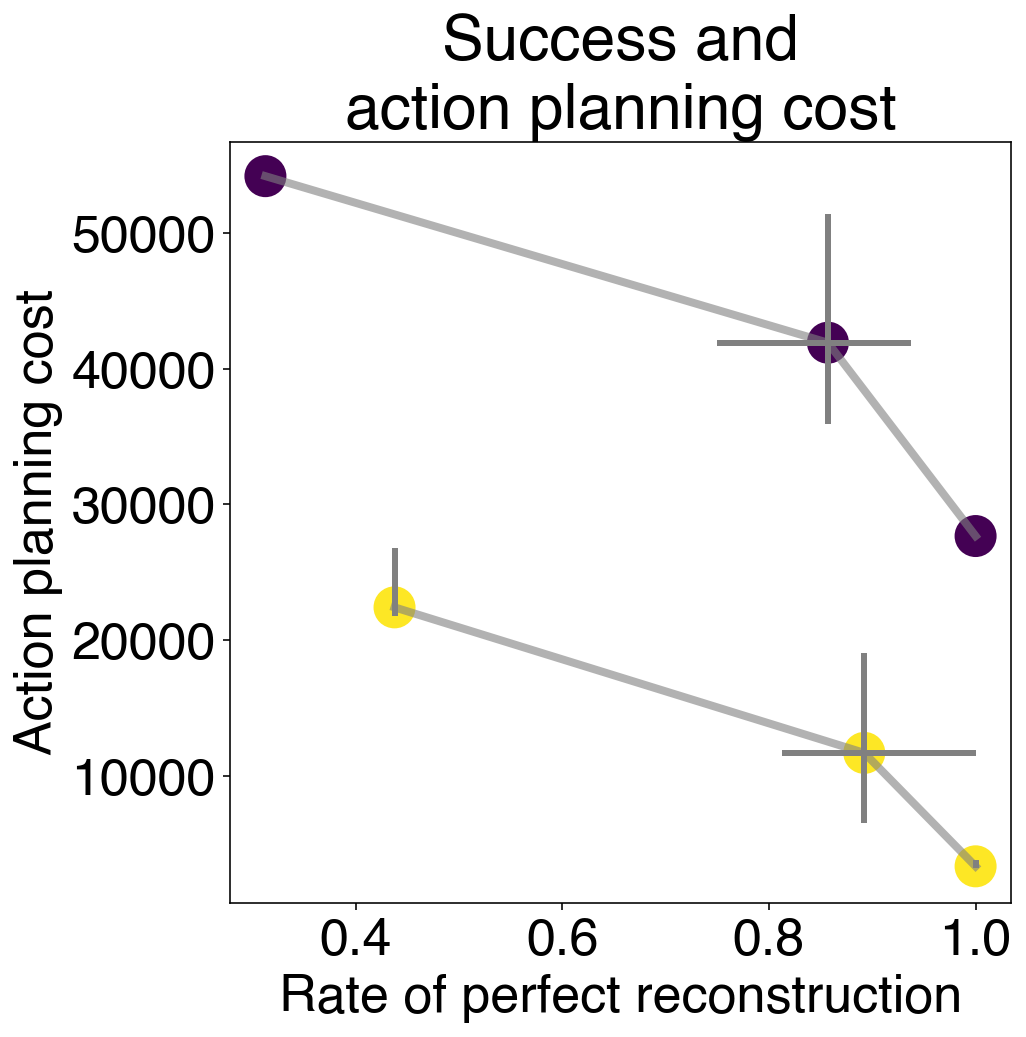

In [114]:
plt.figure(figsize=(7, 7))

Ys = agent_df["partial_planning_cost sum"]["mean"]
Xs = a_agent_df["world_float max"]["mean"]
XCIs = np.array(a_agent_df["world_float max"]["CI95"]).T
YCIs = np.array(agent_df["partial_planning_cost sum"]["CI95"]).T
XCIs = np.array([list(x) for x in XCIs]).T
YCIs = np.array([list(x) for x in YCIs]).T
Xerr = np.array([abs(Xs - XCIs[0]), abs(Xs - XCIs[1])])
Yerr = np.array([abs(Ys - YCIs[0]), abs(Ys - YCIs[1])])
labels = agent_df.index.get_level_values(0)

plt.scatter(Xs, Ys, c=labels.str.contains("BFS"), s=400)
plt.errorbar(Xs, Ys, xerr=Xerr, yerr=Yerr, linewidth=0, elinewidth=3, ecolor="grey"),
plt.plot(
    Xs[labels.str.contains("BFS")],
    Ys[labels.str.contains("BFS")],
    alpha=0.6,
    c="grey",
    linewidth=4,
)
plt.plot(
    Xs[~labels.str.contains("BFS")],
    Ys[~labels.str.contains("BFS")],
    alpha=0.6,
    c="grey",
    linewidth=4,
)

axes = plt.gca()
# axes.set_xscale('log')
# for i,label in enumerate(labels):
#     plt.annotate(
#                 label,
#                 (Xs[i],Ys[i]),
#                 xytext=(-35, -5),
#                 textcoords='offset points',
#                 ha='left',
#                 va='top',
#                 fontsize=18,
#                 wrap=True
#             )

# # set x ticks
# ax = plt.gca()
# x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 10)
# ax.xaxis.set_major_locator(x_major)
# x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
# ax.xaxis.set_minor_locator(x_minor)
# ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
# ax.tick_params(axis='both', which='minor', width=1, length=5)
# ax.tick_params(axis='both', which='major', width=1.5, length=10)


plt.title("Success and\naction planning cost")
plt.ylabel("Action planning cost")
plt.xlabel("Rate of perfect reconstruction")
# plt.ylim(0,1.05)
plt.savefig("../results/plots/scatter_success_planning_cost.png", bbox_inches="tight")

plt.show()

Let's try this with total cost

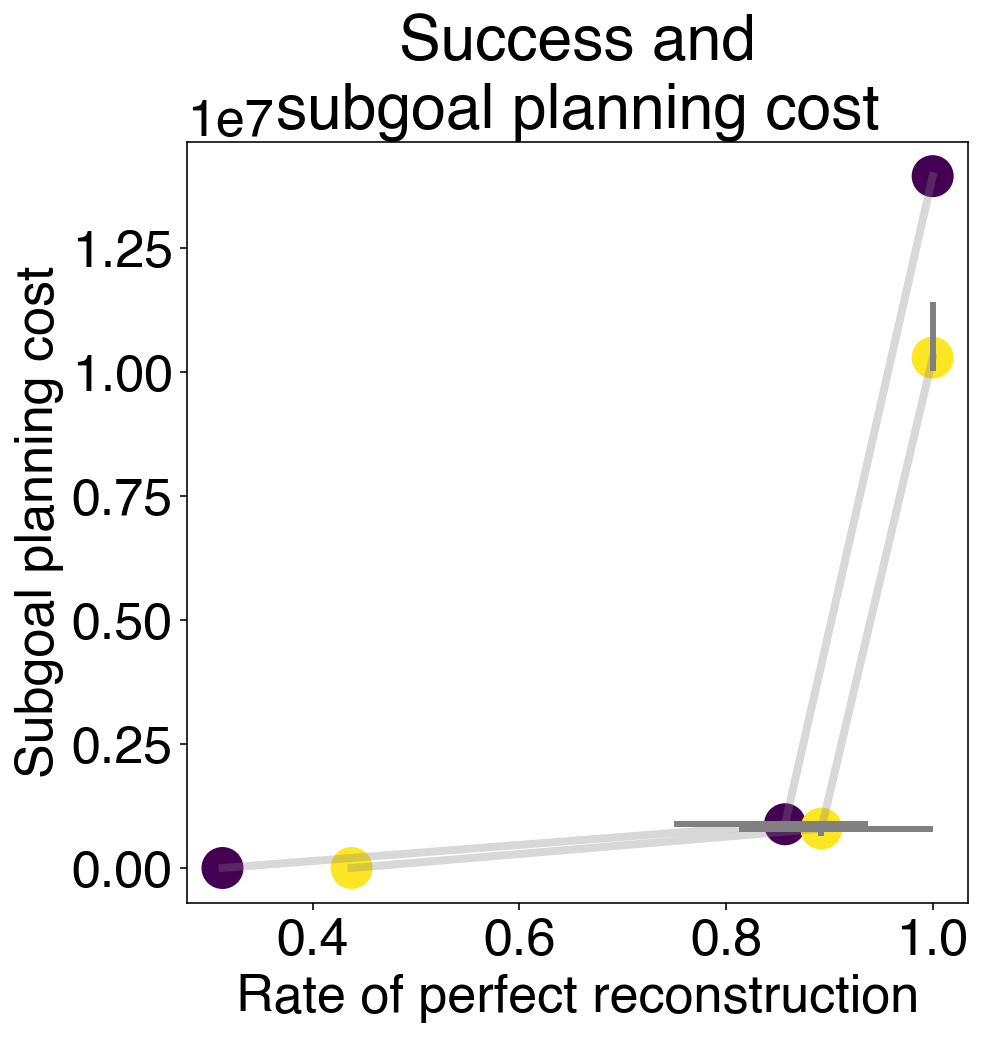

In [115]:
plt.figure(figsize=(7, 7))

Ys = agent_df["all_sequences_planning_cost sum"]["mean"]
Xs = a_agent_df["world_float max"]["mean"]
XCIs = np.array(a_agent_df["world_float max"]["CI95"]).T
YCIs = np.array(agent_df["all_sequences_planning_cost sum"]["CI95"]).T
XCIs = np.array([list(x) for x in XCIs]).T
YCIs = np.array([list(x) for x in YCIs]).T
Xerr = np.array([abs(Xs - XCIs[0]), abs(Xs - XCIs[1])])
Yerr = np.array([abs(Ys - YCIs[0]), abs(Ys - YCIs[1])])
labels = agent_df.index.get_level_values(0)

plt.scatter(Xs, Ys, c=labels.str.contains("BFS"), s=400)
plt.errorbar(Xs, Ys, xerr=Xerr, yerr=Yerr, linewidth=0, elinewidth=3, ecolor="grey"),
plt.plot(
    Xs[labels.str.contains("BFS")],
    Ys[labels.str.contains("BFS")],
    alpha=0.3,
    c="grey",
    linewidth=4,
)
plt.plot(
    Xs[~labels.str.contains("BFS")],
    Ys[~labels.str.contains("BFS")],
    alpha=0.3,
    c="grey",
    linewidth=4,
)

axes = plt.gca()
# axes.set_yscale('log')
# for i,label in enumerate(labels):
#     plt.annotate(
#                 label,
#                 (Xs[i],Ys[i]),
#                 xytext=(-35, -5),
#                 textcoords='offset points',
#                 ha='left',
#                 va='top',
#                 fontsize=18,
#                 wrap=True
#             )

# # set x ticks
# ax = plt.gca()
# x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 10)
# ax.xaxis.set_major_locator(x_major)
# x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
# ax.xaxis.set_minor_locator(x_minor)
# ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
# ax.tick_params(axis='both', which='minor', width=1, length=5)
# ax.tick_params(axis='both', which='major', width=1.5, length=10)


plt.title("Success and\nsubgoal planning cost")
plt.ylabel("Subgoal planning cost")
plt.xlabel("Rate of perfect reconstruction")
# plt.ylim(0,1.05)
plt.savefig("../results/plots/scatter_success_subgoal_cost.png", bbox_inches="tight")
plt.show()

---

## $\lambda$

===dashed line for baselines===
note that range of lambda differs between subgoal planners

Set up the bootstrapped dataframes over lambda:

In [29]:
# this is going to take a while
# which columns do we want in our bootstrapped cw_df?
columns = [
    "partial_planning_cost sum",
    "partial_planning_cost mean",
    "partial_solution_cost sum",
    "partial_solution_cost mean",
    "planning_cost sum",
    "planning_cost mean",
    "all_sequences_planning_cost sum",
    "all_sequences_planning_cost mean",
    "partial_chosen_sequence_length sum",
    "num_blocks",
]

# initialize df
entries = []
rows = {}

# get bootstrapping entries
for agent in wfdf["note item"].unique():
    for c_weight in sorted(wfdf[wfdf["note item"] == agent]["c_weight item"].unique()):
        entries.append((agent, c_weight))


# let's bootstrap in parallel
def _bootstrap_lambda(entry):
    agent, c_weight = entry
    new_row = {("note item", ""): agent, ("c_weight item", ""): c_weight}
    for column in columns:
        if not math.isnan(c_weight):
            mean, CI = bootstrap(
                wfdf[
                    (wfdf["note item"] == agent) & (wfdf["c_weight item"] == c_weight)
                ],
                column,
            )
        else:  # Action level doesn't have c_weight
            mean, CI = bootstrap(
                wfdf[(wfdf["note item"] == agent)], column
            )  # insert into dictionary
        new_row[(column, "mean")] = mean
        new_row[(column, "CI95")] = np.array(CI)
    return new_row


rows = p_tqdm.p_map(_bootstrap_lambda, entries)
# create hierarchical dict
rows = {(r[("note item", "")], r[("c_weight item", "")]): r for r in rows}

# create df
cw_df = pd.DataFrame(rows).transpose()

In [32]:
# Let's store to not have to run that again
cw_df.to_pickle("../results/dataframes/cw_df.pkl")

In [30]:
# this is going to take a while
# which columns do we want in our bootstrapped cw_df_all?
columns = ["world_float max"]

# initialize df
entries = []
rows = {}

# get bootstrapping entries
for agent in fdf["note item"].unique():
    for c_weight in sorted(fdf[fdf["note item"] == agent]["c_weight item"].unique()):
        entries.append((agent, c_weight))


# let's bootstrap in parallel
def _bootstrap_lambda(entry):
    agent, c_weight = entry
    new_row = {("note item", ""): agent, ("c_weight item", ""): c_weight}
    for column in columns:
        if not math.isnan(c_weight):
            mean, CI = bootstrap(
                fdf[(fdf["note item"] == agent) & (fdf["c_weight item"] == c_weight)],
                column,
            )
        else:  # Action level doesn't have c_weight
            mean, CI = bootstrap(fdf[(fdf["note item"] == agent)], column)
        # insert into dictionary
        new_row[(column, "mean")] = mean
        new_row[(column, "CI95")] = np.array(CI)
    return new_row


rows = p_tqdm.p_map(_bootstrap_lambda, entries)
# create hierarchical dict
rows = {(r[("note item", "")], r[("c_weight item", "")]): r for r in rows}

# create df
cw_df_all = pd.DataFrame(rows).transpose()

In [33]:
# Let's store to not have to run that again
cw_df_all.to_pickle("../results/dataframes/cw_df_all.pkl")

In [31]:
cw_df_all

note item  \
                                                
A*\nScoping       0.000000        A*\nScoping   
                  0.000030        A*\nScoping   
                  0.000061        A*\nScoping   
                  0.000091        A*\nScoping   
                  0.000121        A*\nScoping   
                  0.000152        A*\nScoping   
...                                       ...   
BFS\nScoping      0.007919       BFS\nScoping   
                  0.008000       BFS\nScoping   
BFS\nFull         1.000000          BFS\nFull   
A*\nFull          1.000000           A*\nFull   
A*\nAction level  NaN        A*\nAction level   
BFS\nAction level NaN       BFS\nAction level   

                           c_weight item  \
                                           
A*\nScoping       0.000000             0   
                  0.000030    3.0303e-05   
                  0.000061   6.06061e-05   
                  0.000091   9.09091e-05   
                  0.000121   0.000121212   
                  0.000152   0.000151515   
...                                  ...   
BFS\nScoping      0.007919    0.00791919   
                  0.008000         0.008   
BFS\nFull         1.000000             1   
A*\nFull          1.000000             1   
A*\nAction level  NaN                NaN   
BFS\nAction level NaN                NaN   

                           world_float max  \
                                      mean   
A*\nScoping       0.000000               1   
                  0.000030               1   
                  0.000061               1   
                  0.000091               1   
                  0.000121               1   
                  0.000152               1   
...                                    ...   
BFS\nScoping      0.007919            0.75   
                  0.008000            0.75   
BFS\nFull         1.000000               1   
A*\nFull          1.000000               1   
A*\nAction level  NaN               0.3125   
BFS\nAction level NaN               0.4375   

                                              
                                        CI95  
A*\nScoping       0.000000        [1.0, 1.0]  
                  0.000030        [1.0, 1.0]  
                  0.000061        [1.0, 1.0]  
                  0.000091        [1.0, 1.0]  
                  0.000121        [1.0, 1.0]  
                  0.000152        [1.0, 1.0]  
...                                      ...  
BFS\nScoping      0.007919      [0.75, 0.75]  
                  0.008000      [0.75, 0.75]  
BFS\nFull         1.000000        [1.0, 1.0]  
A*\nFull          1.000000        [1.0, 1.0]  
A*\nAction level  NaN       [0.3125, 0.3125]  
BFS\nAction level NaN       [0.4375, 0.4375]  

[204 rows x 4 columns]

### Bootstrapping Pearson's r helper functions

In [149]:
# bootstrapped Pearsons r helper function
def _sample_pearsons_r_lambda(entry):
    df, agent, column = entry
    measurements = []
    c_weights = sorted(df[df["note item"] == agent]["c_weight item"].unique())
    for c_weight in c_weights:
        # for each weight, get one mean value for the 16 structures
        mean, _ = bootstrap(
            df[(df["note item"] == agent) & (df["c_weight item"] == c_weight)],
            column,
            iterations=1,
            show_tqdm=False,
        )
        measurements.append(mean)
    # get Pearson's r
    r, p = stats.pearsonr(measurements, c_weights)
    return r

In [214]:
# bootstrap Pearson's r
def bootstrap_pearsons_r_lambda(
    df, column, iterations=1000, C_interval=[2.5, 97.5], verbose=True
):
    agents = [
        a for a in df["note item"].unique() if "Scoping" in a
    ]  # only makes sense for scoping agent
    results = {}
    for agent in agents:
        print(agent)
        # get iterations many Pearson's r
        entries = [(df, agent, column)] * iterations
        rs = p_tqdm.t_map(
            _sample_pearsons_r_lambda, entries
        )  # just seems to hang when parallelized
        rs = np.array(rs)
        c_weights = sorted(df[df["note item"] == agent]["c_weight item"].unique())
        mean = np.nanmean(
            rs
        )  # we might at times get a run where the result is constant across lambda, thus nanmean
        CI = np.nanpercentile(rs, C_interval)
        deg_freedom = len(df[df["note item"] == agent]["c_weight item"].unique()) - 2
        rs_an = rs[~np.isnan(rs)]  # get the non nan measurements
        p_up = (sum(rs_an < 0)) / (len(rs_an) * 2)  # assuming a positive r value
        p_down = (sum(rs_an > 0)) / (len(rs_an) * 2)  # assuming a negative r value
        if verbose:
            print(
                "mean: "
                + str(mean)
                + " \t CI: "
                + str(CI)
                + " \t p positive: "
                + str(p_up)
                + " \t p negative: "
                + str(p_down)
                + " \t df: "
                + str(deg_freedom)
            )
            n_failed = sum([math.isnan(x) for x in rs])
            if n_failed > 0:
                print(n_failed, "Pearson's r couldn't be computed")
        results[agent] = {
            "mean": mean,
            "CI95": CI,
            "p positive": p_up,
            "p negative": p_down,
            "df": deg_freedom,
        }
    return results

### Misc plots

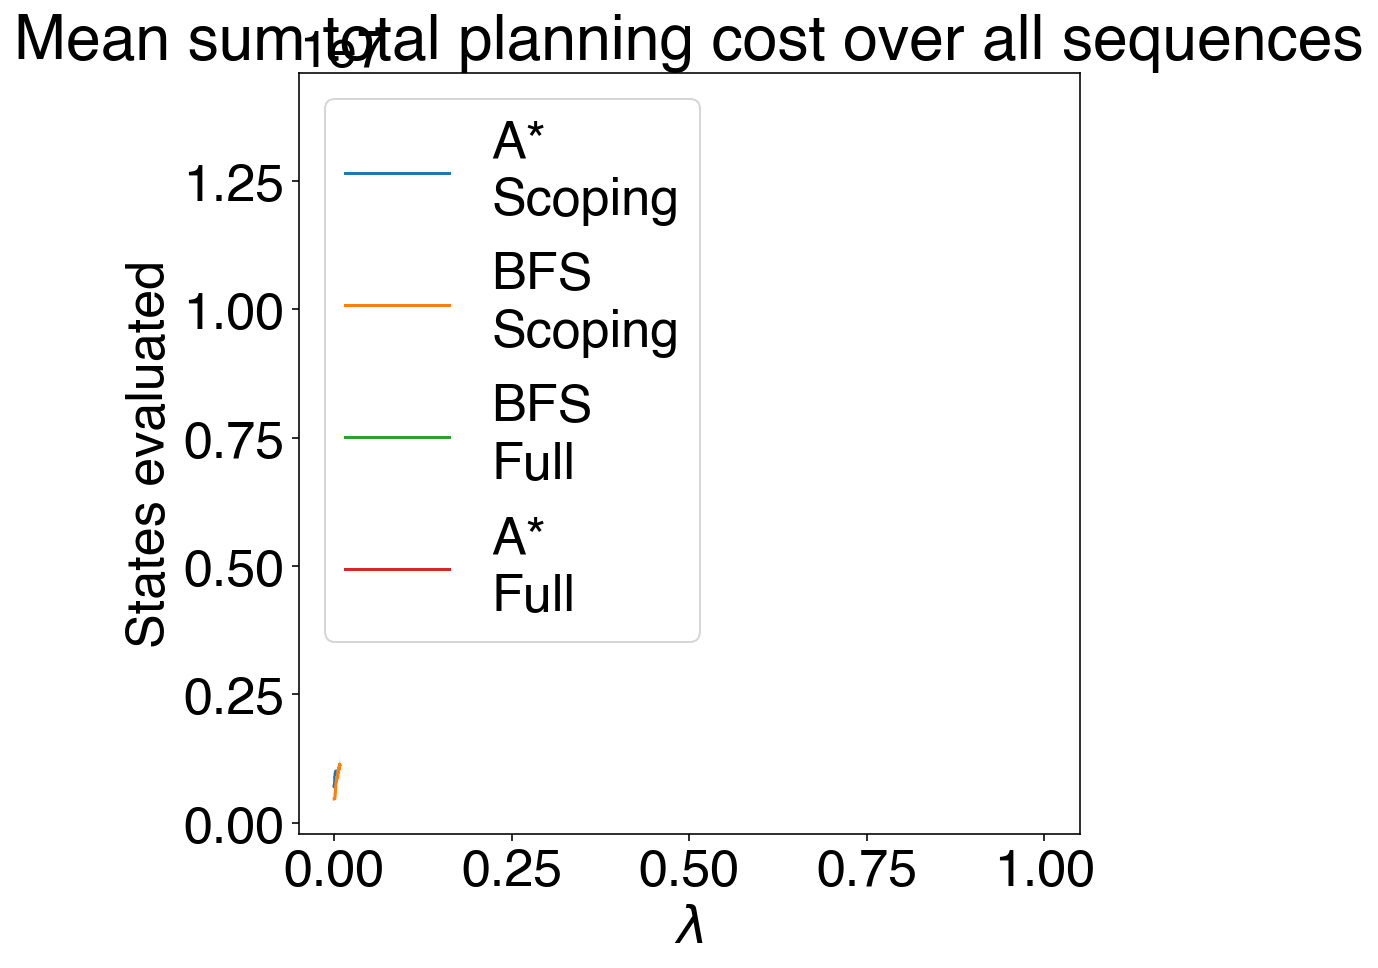

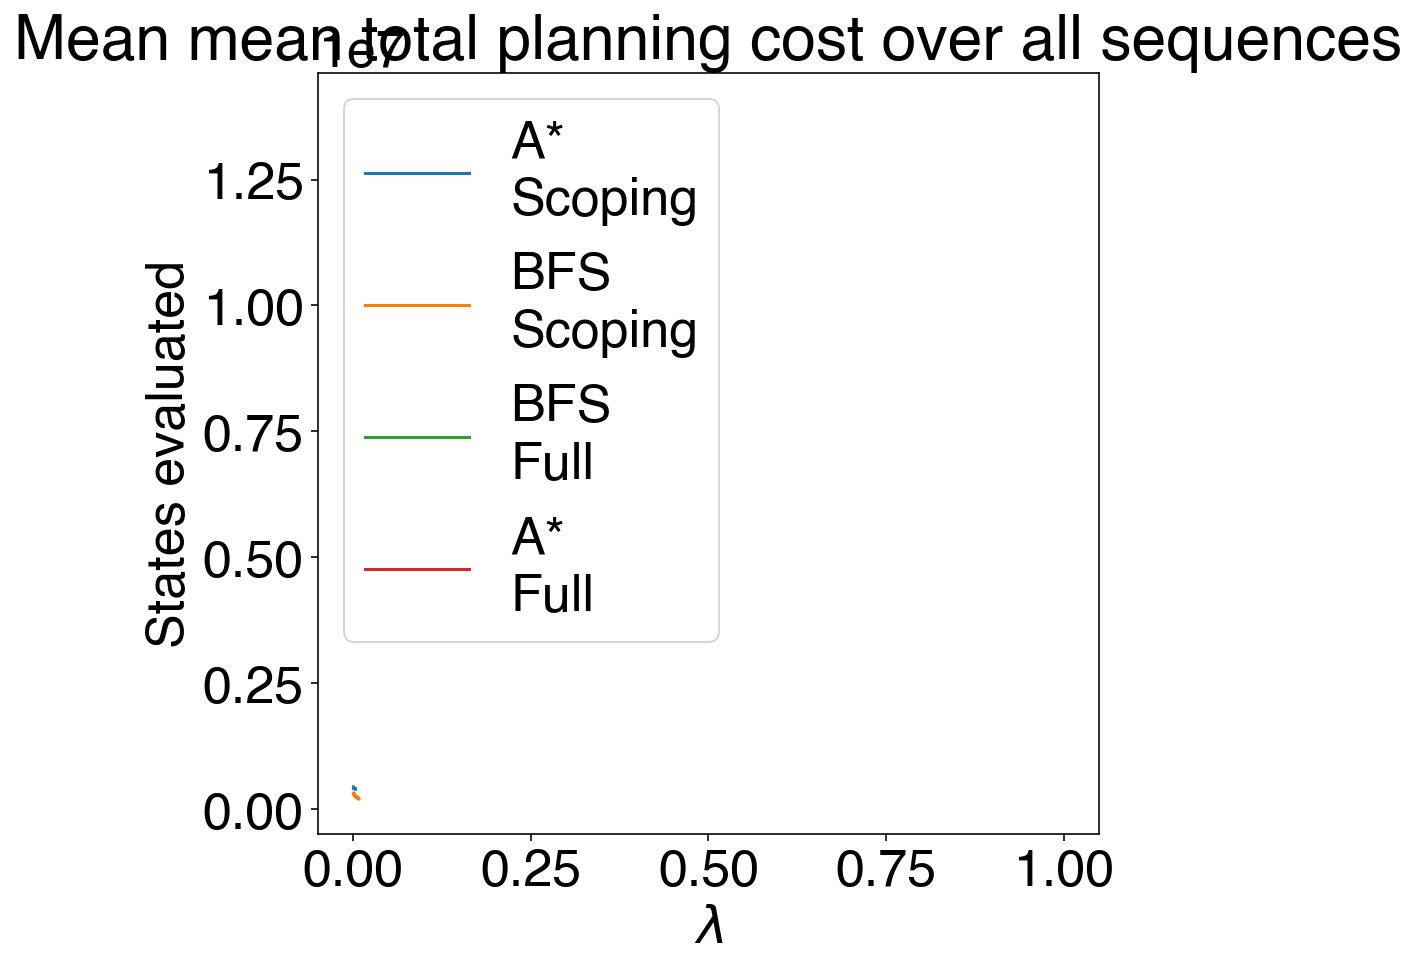

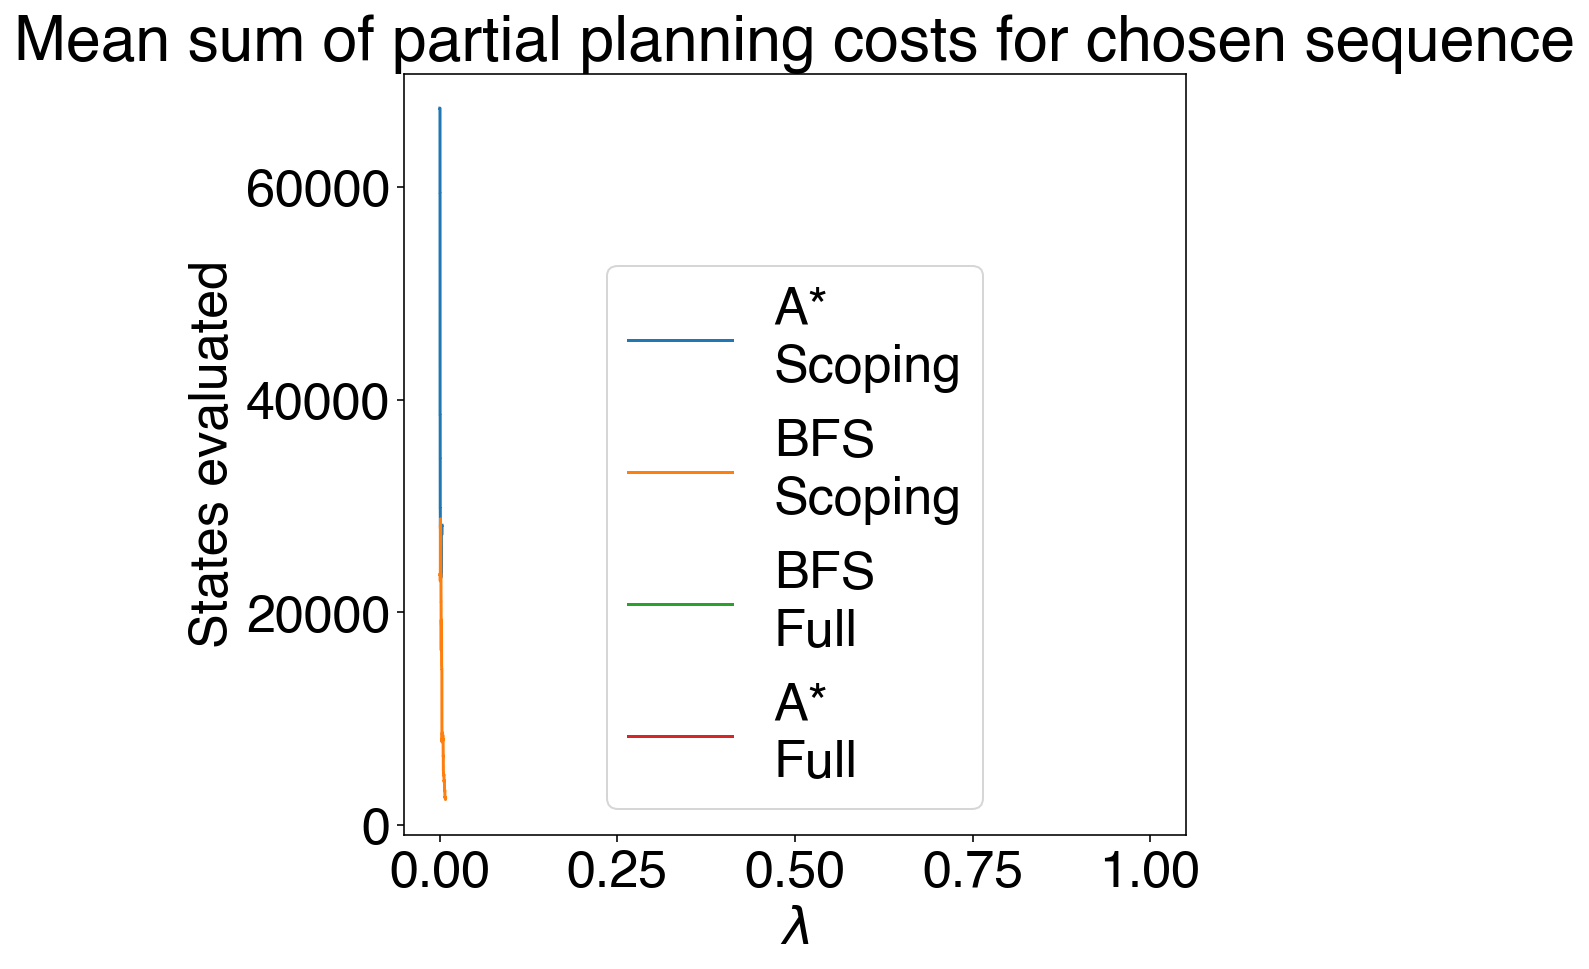

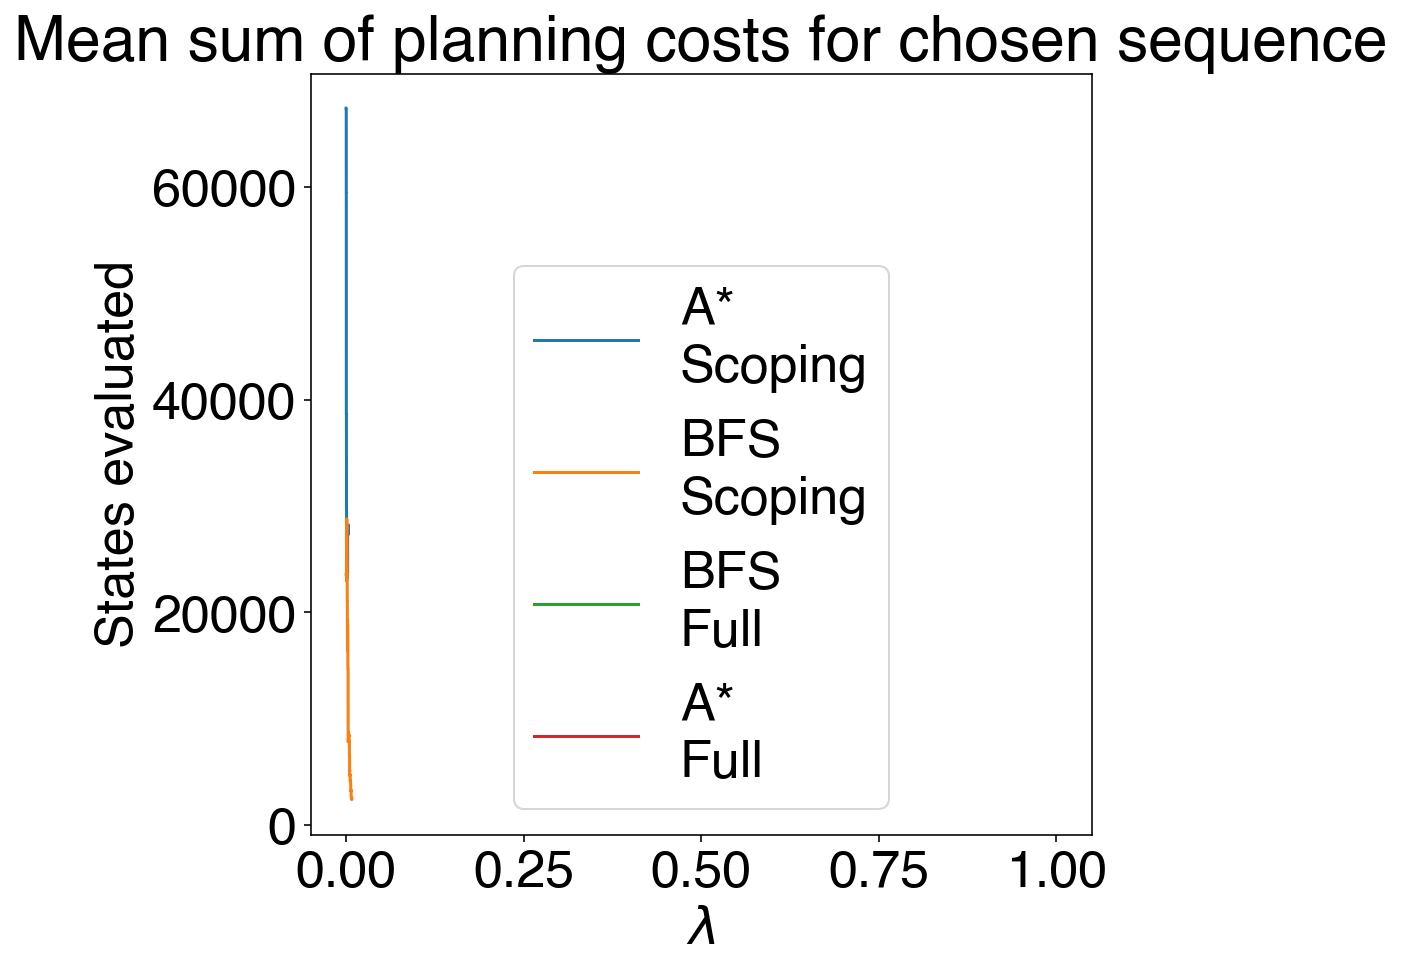

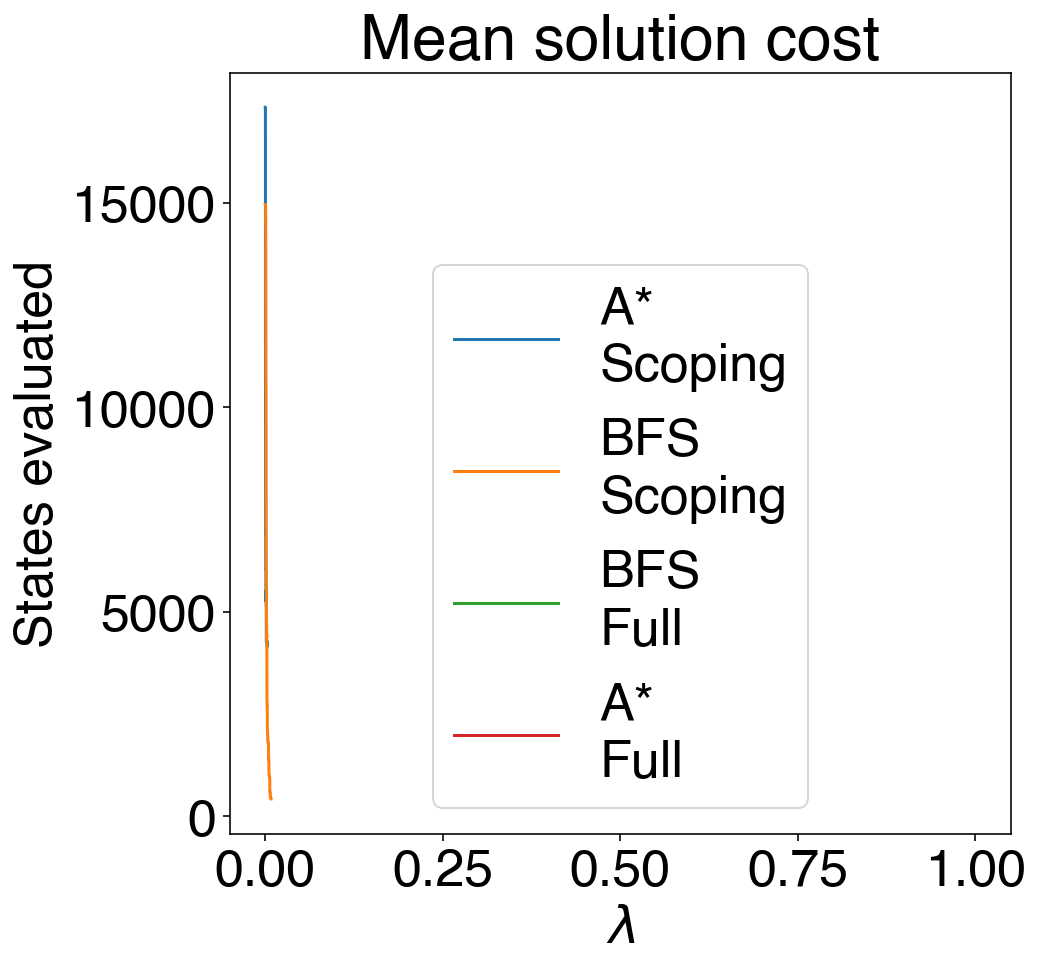

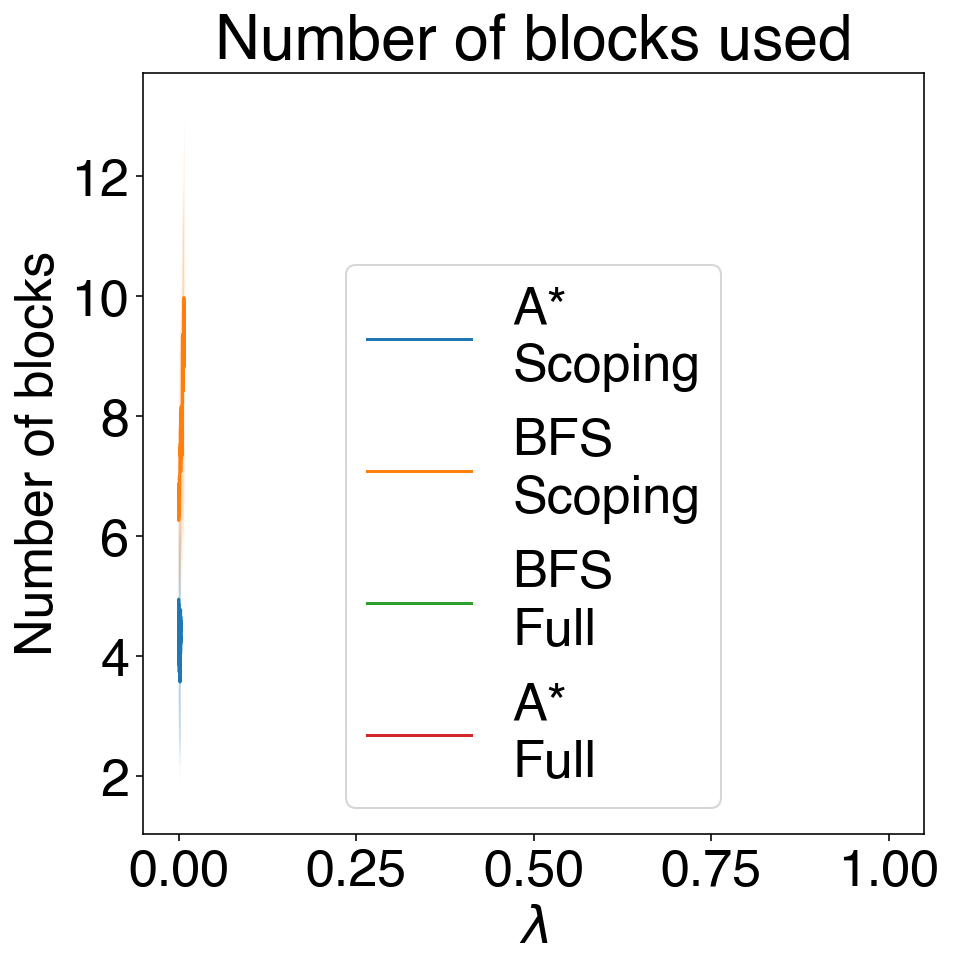

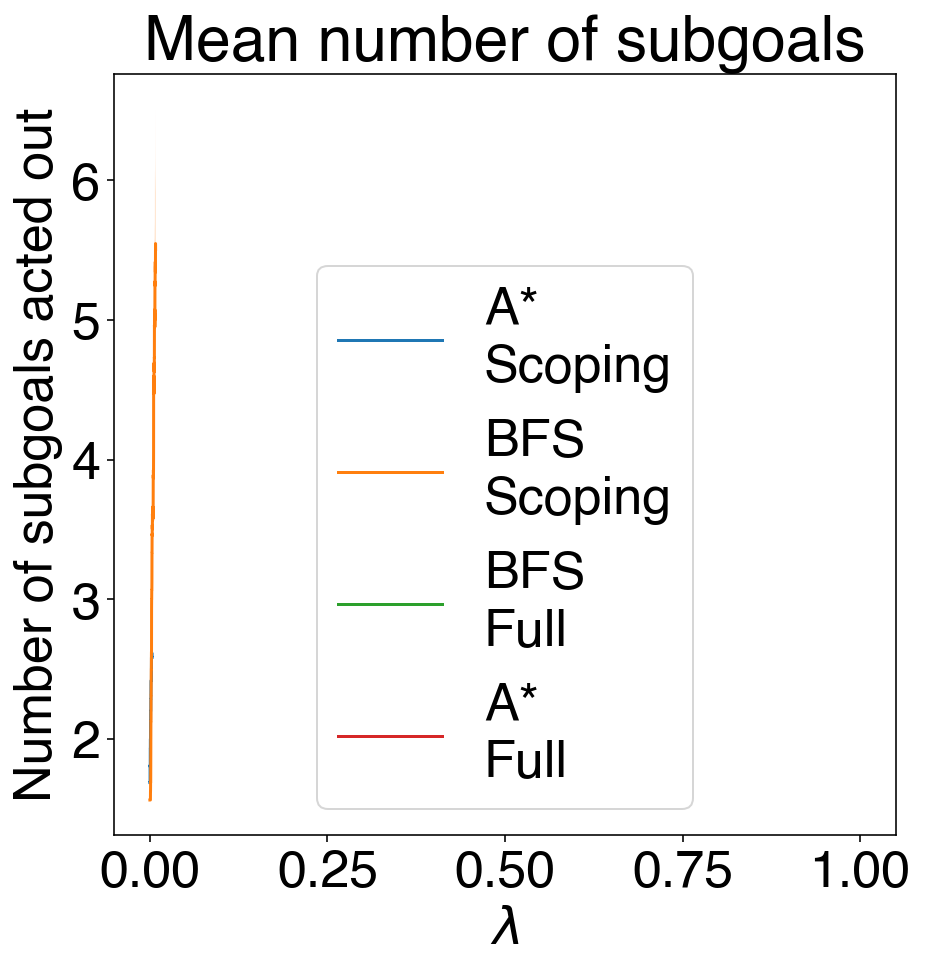

In [50]:
for index in cw_df.dropna().index.get_level_values(0).unique():
    column = "all_sequences_planning_cost sum"
    CIs = np.array([list(x) for x in cw_df.dropna()[column]["CI95"][index]]).T
    Xs = cw_df.dropna()[column]["mean"][index].index
    Ys = cw_df.dropna()[column]["mean"][index]
    Error = np.array([Ys - CIs[0], Ys + CIs[1]])
    plt.errorbar(
        Xs,
        Ys,
        #                  yerr=Error,
        label=index,
    )
    plt.fill_between(Xs, CIs[0], CIs[1], alpha=0.3)
    plt.title("Mean sum total planning cost over all sequences")
    plt.ylabel("States evaluated")
    #     plt.yscale('log')
    plt.xlabel("$\lambda$")
    plt.legend()
plt.show()

for index in cw_df.dropna().index.get_level_values(0).unique():
    column = "all_sequences_planning_cost mean"
    CIs = np.array([list(x) for x in cw_df.dropna()[column]["CI95"][index]]).T
    Xs = cw_df.dropna()[column]["mean"][index].index
    Ys = cw_df.dropna()[column]["mean"][index]
    Error = np.array([Ys - CIs[0], Ys + CIs[1]])
    plt.errorbar(
        Xs,
        Ys,
        #                  yerr=Error,
        label=index,
    )
    plt.fill_between(Xs, CIs[0], CIs[1], alpha=0.3)
    plt.title("Mean mean total planning cost over all sequences")
    plt.ylabel("States evaluated")
    #     plt.yscale('log')
    plt.xlabel("$\lambda$")
    plt.legend()
plt.savefig("../results/plots/total_planning_cost_over_lambda")
plt.show()

for index in cw_df.dropna().index.get_level_values(0).unique():
    column = "partial_planning_cost sum"
    CIs = np.array([list(x) for x in cw_df.dropna()[column]["CI95"][index]]).T
    Xs = cw_df.dropna()[column]["mean"][index].index
    Ys = cw_df.dropna()[column]["mean"][index]
    Error = np.array([Ys - CIs[0], Ys + CIs[1]])
    plt.errorbar(
        Xs,
        Ys,
        #                  yerr=Error,
        label=index,
    )
    plt.fill_between(Xs, CIs[0], CIs[1], alpha=0.3)
    plt.title("Mean sum of partial planning costs for chosen sequence")
    plt.ylabel("States evaluated")
    #     plt.yscale('log')
    plt.xlabel("$\lambda$")
    plt.legend()
plt.savefig("../results/plots/sum_planning_cost_chosen_seq")
plt.show()

for index in cw_df.dropna().index.get_level_values(0).unique():
    column = "planning_cost sum"
    CIs = np.array([list(x) for x in cw_df.dropna()[column]["CI95"][index]]).T
    Xs = cw_df.dropna()[column]["mean"][index].index
    Ys = cw_df.dropna()[column]["mean"][index]
    Error = np.array([Ys - CIs[0], Ys + CIs[1]])
    plt.errorbar(
        Xs,
        Ys,
        #                  yerr=Error,
        label=index,
    )
    plt.fill_between(Xs, CIs[0], CIs[1], alpha=0.3)
    plt.title("Mean sum of planning costs for chosen sequence")
    plt.ylabel("States evaluated")
    #     plt.yscale('log')
    plt.xlabel("$\lambda$")
    plt.legend()
plt.show()

for index in cw_df.dropna().index.get_level_values(0).unique():
    column = "partial_solution_cost mean"
    CIs = np.array([list(x) for x in cw_df.dropna()[column]["CI95"][index]]).T
    Xs = cw_df.dropna()[column]["mean"][index].index
    Ys = cw_df.dropna()[column]["mean"][index]
    Error = np.array([Ys - CIs[0], Ys + CIs[1]])
    plt.errorbar(
        Xs,
        Ys,
        #                  yerr=Error,
        label=index,
    )
    plt.fill_between(Xs, CIs[0], CIs[1], alpha=0.3)
    plt.title("Mean solution cost")
    plt.ylabel("States evaluated")
    #     plt.yscale('log')
    plt.xlabel("$\lambda$")
    plt.legend()
plt.show()

for index in cw_df.dropna().index.get_level_values(0).unique():
    column = "num_blocks"
    CIs = np.array([list(x) for x in cw_df.dropna()[column]["CI95"][index]]).T
    Xs = cw_df.dropna()[column]["mean"][index].index
    Ys = cw_df.dropna()[column]["mean"][index]
    Error = np.array([Ys - CIs[0], Ys + CIs[1]])
    plt.errorbar(
        Xs,
        Ys,
        #                  yerr=Error,
        label=index,
    )
    plt.fill_between(Xs, CIs[0], CIs[1], alpha=0.3)
    plt.title("Number of blocks used")
    plt.ylabel("Number of blocks")
    #     plt.yscale('log')
    plt.xlabel("$\lambda$")
    plt.legend()
plt.show()

for index in cw_df.dropna().index.get_level_values(0).unique():
    column = "partial_chosen_sequence_length sum"
    CIs = np.array([list(x) for x in cw_df.dropna()[column]["CI95"][index]]).T
    Xs = cw_df.dropna()[column]["mean"][index].index
    Ys = cw_df.dropna()[column]["mean"][index]
    Error = np.array([Ys - CIs[0], Ys + CIs[1]])
    plt.errorbar(
        Xs,
        Ys,
        #                  yerr=Error,
        label=index,
    )
    plt.fill_between(Xs, CIs[0], CIs[1], alpha=0.3)
    plt.title("Mean number of subgoals")
    plt.ylabel("Number of subgoals acted out")
    plt.xlabel("$\lambda$")
    plt.legend()
plt.savefig("../results/plots/lambda_n_subgoals")
plt.show()

Proportion perfect reconstruction—this plot is not conditioned on success.

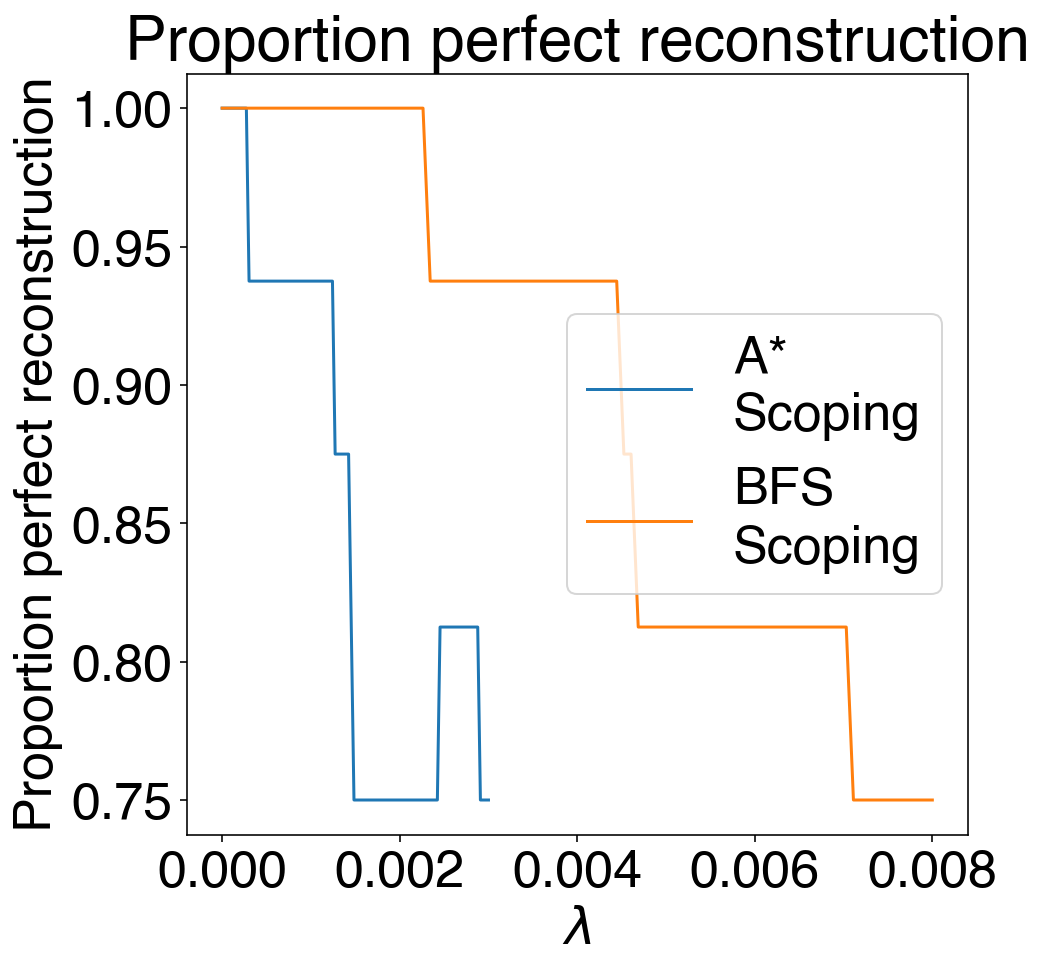

In [64]:
for index in cw_df_all.index.get_level_values(0).unique():
    if "Scoping" not in index:
        continue  # only plot scoping planners
    column = "world_float max"
    CIs = np.array([list(x) for x in cw_df_all.dropna()[column]["CI95"][index]]).T
    Xs = cw_df_all.dropna()[column]["mean"][index].index
    Ys = cw_df_all.dropna()[column]["mean"][index]
    Error = np.array([Ys - CIs[0], Ys + CIs[1]])
    plt.errorbar(
        Xs,
        Ys,
        #                  yerr=Error,
        label=index,
    )
    plt.fill_between(Xs, CIs[0], CIs[1], alpha=0.3)
    plt.title("Proportion perfect reconstruction")
    plt.ylabel("Proportion perfect reconstruction")
    plt.xlabel("$\lambda$")
    plt.legend()
plt.savefig("../results/plots/proportion_perfect_over_lambda")
plt.show()

### Paper ready figures & stats 💎

#### Action planning cost

A*
LinregressResult(slope=-7863292.49763356, intercept=42443.55672584595, rvalue=-0.580604115227358, pvalue=2.421538478954888e-10, stderr=1113871.0581341847) df: 198 t: -10.034345912463529


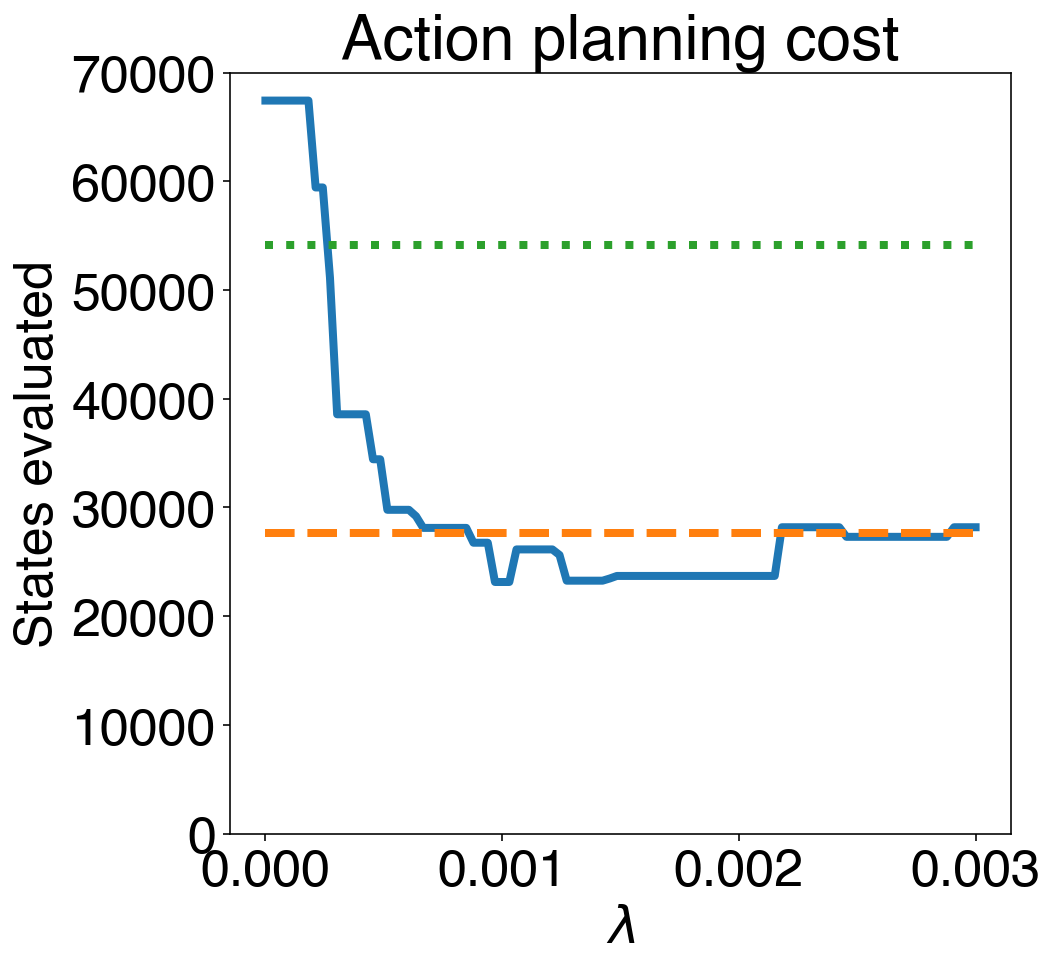

BFS
LinregressResult(slope=-3357650.1596690114, intercept=24608.87335431524, rvalue=-0.9273898279154494, pvalue=1.2292418088329318e-43, stderr=136818.1118223627) df: 198 t: -34.8828056938548


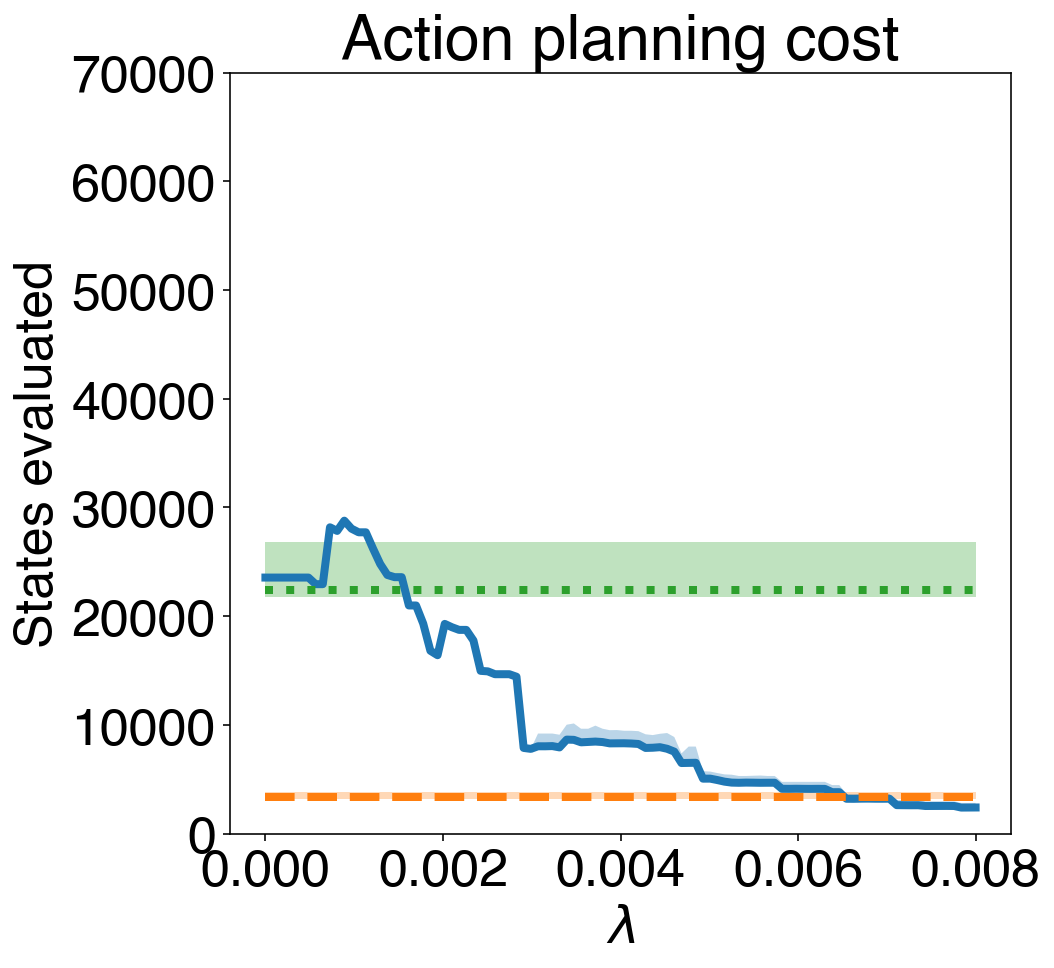

In [221]:
for agent in ["A*", "BFS"]:
    print(agent)
    # plot scoping graph
    index = agent + "\nScoping"
    column = "partial_planning_cost sum"
    CIs = np.array([list(x) for x in cw_df.dropna()[column]["CI95"][index]]).T
    Xs = cw_df.dropna()[column]["mean"][index].index
    Ys = cw_df.dropna()[column]["mean"][index]
    Error = np.array([Ys - CIs[0], Ys + CIs[1]])
    plt.errorbar(
        Xs,
        Ys,
        #                  yerr=Error,
        label="Scoping",
        linewidth=4,
    )
    plt.fill_between(Xs, CIs[0], CIs[1], alpha=0.3)

    # stats: linear model on scoping line over lambda
    lm = stats.linregress(list(Xs), list(Ys))
    df = len(Xs) + len(Ys) - 2
    t = (lm.rvalue * math.sqrt(df)) / (math.sqrt(1 - (lm.rvalue**2)))
    print(lm, "df:", df, "t:", t)

    # plot lines for full
    index = agent + "\nFull"
    column = "partial_planning_cost sum"
    Ys = [cw_df.dropna()[column]["mean"][index]] * len(Xs)
    CIs = np.array([list(x) for x in cw_df.dropna()[column]["CI95"][index]]).T
    Error = np.array([Ys - CIs[0], Ys + CIs[1]])
    plt.errorbar(Xs, Ys, label="Full", linestyle="--", linewidth=4)
    plt.fill_between(Xs, CIs[0], CIs[1], alpha=0.3)

    # plot line for action level
    index = agent + "\nAction level"
    column = "partial_planning_cost sum"
    Ys = [cw_df[column]["mean"][index].dropna()] * len(Xs)
    CIs = np.array([list(x) for x in cw_df[column]["CI95"][index].dropna()]).T
    Error = np.array([Ys - CIs[0], Ys + CIs[1]])
    plt.errorbar(Xs, Ys, label="Action level", linestyle=":", linewidth=4)
    plt.fill_between(Xs, CIs[0], CIs[1], alpha=0.3)

    plt.title("Action planning cost")
    plt.ylabel("States evaluated")
    #     plt.yscale('log')
    plt.xlabel("$\lambda$")
    #     plt.legend()
    plt.ylim(0, 70000)
    plt.savefig(
        "../results/plots/action_planning_cost_lambda" + agent + ".png",
        bbox_inches="tight",
    )
    plt.show()

In [216]:
bootstrap_pearsons_r_lambda(wfdf, "partial_planning_cost sum")

A*
Scoping



mean: -0.5806041152273578 	 CI: [-0.58060412 -0.58060412] 	 p positive: 0.5 	 p negative: 0.0 	 df: 98
BFS
Scoping



mean: -0.9270481884899987 	 CI: [-0.92915269 -0.92534228] 	 p positive: 0.5 	 p negative: 0.0 	 df: 98


{'A*\nScoping': {'mean': -0.5806041152273578,
  'CI95': array([-0.58060412, -0.58060412]),
  'p positive': 0.5,
  'p negative': 0.0,
  'df': 98},
 'BFS\nScoping': {'mean': -0.9270481884899987,
  'CI95': array([-0.92915269, -0.92534228]),
  'p positive': 0.5,
  'p negative': 0.0,
  'df': 98}}

#### Success

A*
LinregressResult(slope=-88.81188118811887, intercept=0.9857178217821784, rvalue=-0.8398525744295532, pvalue=9.4420519921532e-28, stderr=5.7983772381534555) df: 198 t: -21.77128984752322


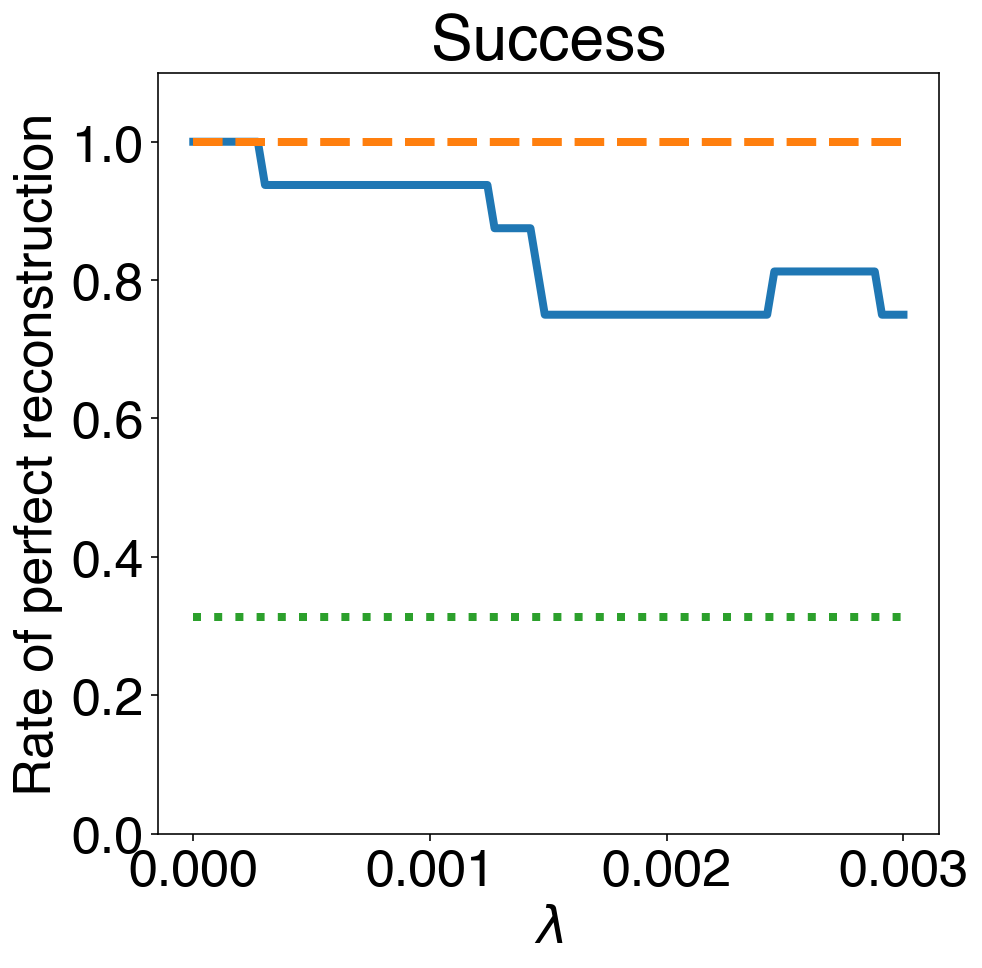

BFS
LinregressResult(slope=-37.19832920792082, intercept=1.0431683168316832, rvalue=-0.9548686841936133, pvalue=1.8156825599372647e-53, stderr=1.1688654935460134) df: 198 t: -45.23540188279213


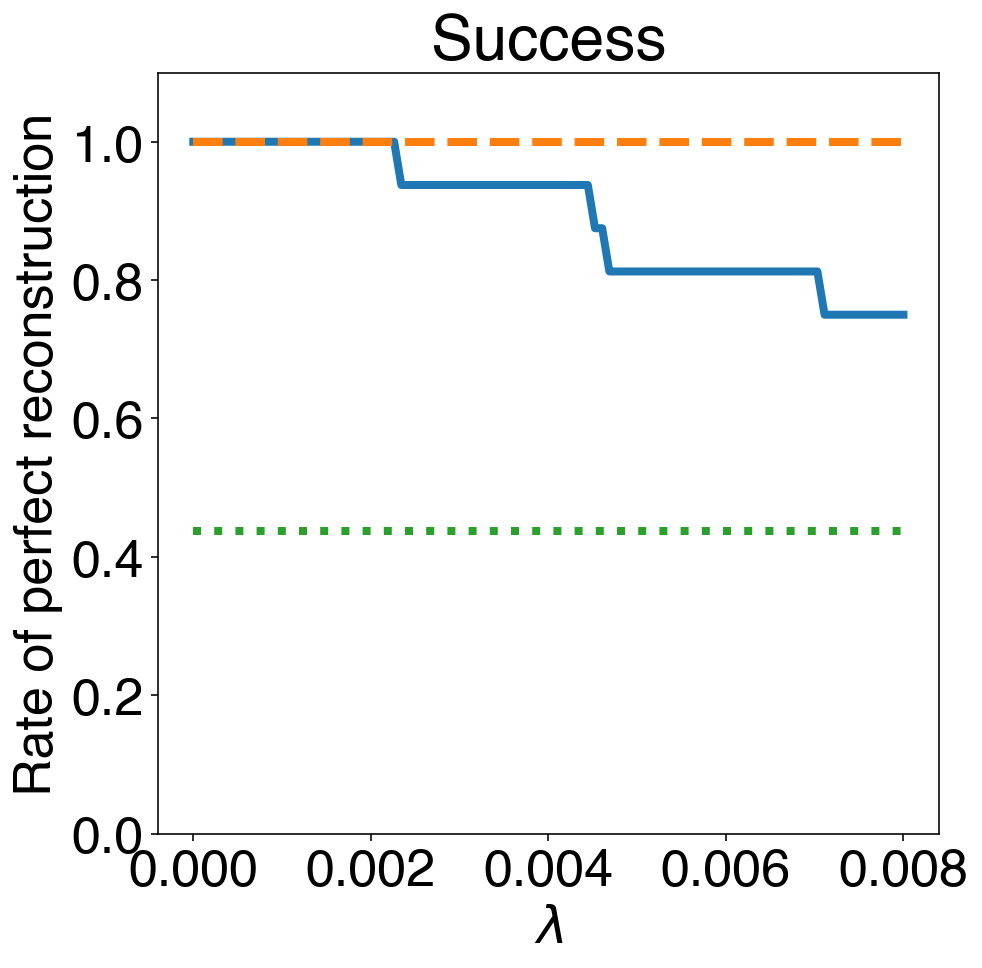

In [196]:
for agent in ["A*", "BFS"]:
    print(agent)
    # plot scoping graph
    index = agent + "\nScoping"
    column = "world_float max"
    CIs = np.array([list(x) for x in cw_df_all.dropna()[column]["CI95"][index]]).T
    Xs = cw_df_all.dropna()[column]["mean"][index].index
    Ys = cw_df_all.dropna()[column]["mean"][index]

    #     CIs = np.array([list(x) for x in cw_df_all.dropna()[column]['<lambda_0>'][index]]).T
    #     Xs = cw_df_all.dropna()[column]['mean'][index].index
    #     Ys = cw_df_all.dropna()[column]['mean'][index]
    Error = np.array([Ys - CIs[0], Ys + CIs[1]])
    plt.errorbar(
        Xs,
        Ys,
        #                  yerr=Error,
        label="Scoping",
        linewidth=4,
    )
    plt.fill_between(Xs, CIs[0], CIs[1], alpha=0.3)

    # stats: linear model on scoping line over lambda
    lm = stats.linregress(list(Xs), list(Ys))
    df = len(Xs) + len(Ys) - 2
    t = (lm.rvalue * math.sqrt(df)) / (math.sqrt(1 - (lm.rvalue**2)))
    print(lm, "df:", df, "t:", t)

    # plot lines for full
    index = agent + "\nFull"
    Ys = [cw_df_all.dropna()[column]["mean"][index]] * len(Xs)
    CIs = np.array([list(x) for x in cw_df_all.dropna()[column]["CI95"][index]]).T
    Error = np.array([Ys - CIs[0], Ys + CIs[1]])
    plt.errorbar(Xs, Ys, label="Full", linestyle="--", linewidth=4)
    plt.fill_between(Xs, CIs[0], CIs[1], alpha=0.3)

    # plot line for action level
    index = agent + "\nAction level"
    Ys = [cw_df_all[column]["mean"][index].dropna()] * len(Xs)
    CIs = np.array([list(x) for x in cw_df_all[column]["CI95"][index].dropna()]).T
    Error = np.array([Ys - CIs[0], Ys + CIs[1]])
    plt.errorbar(Xs, Ys, label="Action level", linestyle=":", linewidth=4)
    plt.fill_between(Xs, CIs[0], CIs[1], alpha=0.3)

    plt.title("Success")
    plt.ylabel("Rate of perfect reconstruction")
    #     plt.yscale('log')
    plt.xlabel("$\lambda$")
    #     plt.legend()
    plt.ylim(0, 1.1)
    plt.savefig("../results/plots/success_lambda" + agent + ".png", bbox_inches="tight")
    plt.show()

In [217]:
bootstrap_pearsons_r_lambda(fdf, "world_float max")

A*
Scoping



mean: -0.8398525744295534 	 CI: [-0.83985257 -0.83985257] 	 p positive: 0.5 	 p negative: 0.0 	 df: 98
BFS
Scoping



mean: -0.9548686841936133 	 CI: [-0.95486868 -0.95486868] 	 p positive: 0.5 	 p negative: 0.0 	 df: 98


{'A*\nScoping': {'mean': -0.8398525744295534,
  'CI95': array([-0.83985257, -0.83985257]),
  'p positive': 0.5,
  'p negative': 0.0,
  'df': 98},
 'BFS\nScoping': {'mean': -0.9548686841936133,
  'CI95': array([-0.95486868, -0.95486868]),
  'p positive': 0.5,
  'p negative': 0.0,
  'df': 98}}

#### Number of blocks used

A*
LinregressResult(slope=-67.6834997098611, intercept=4.360502589308382, rvalue=-0.2638014860733117, pvalue=0.008001646797959585, stderr=24.99939106018874) df: 198 t: -3.848335559658966


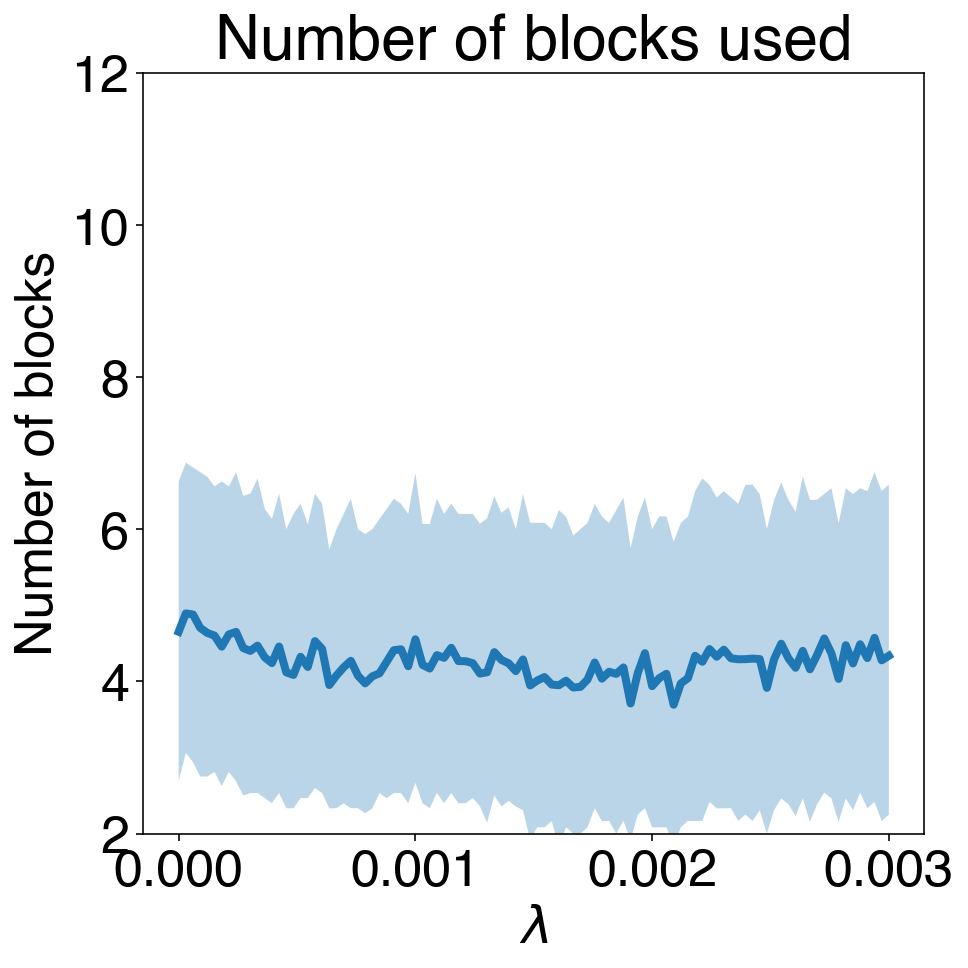

BFS
LinregressResult(slope=372.96765265273075, intercept=6.375000373363437, rvalue=0.9544419989441361, pvalue=2.849909178378491e-53, stderr=11.778834269873487) df: 198 t: 45.007865116859136


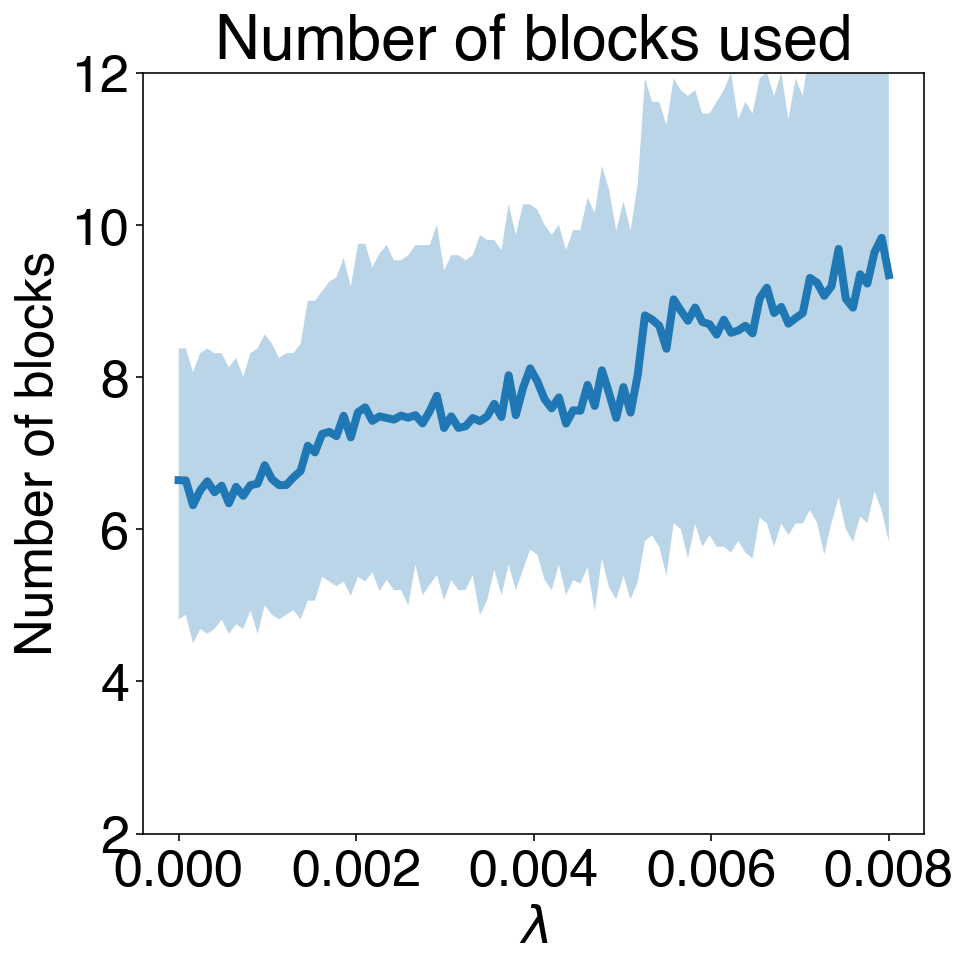

In [219]:
for agent in ["A*", "BFS"]:
    print(agent)
    # plot scoping graph
    index = agent + "\nScoping"
    column = "num_blocks"
    CIs = np.array([list(x) for x in cw_df.dropna()[column]["CI95"][index]]).T
    Xs = cw_df.dropna()[column]["mean"][index].index
    Ys = cw_df.dropna()[column]["mean"][index]
    Error = np.array([Ys - CIs[0], Ys + CIs[1]])
    plt.errorbar(
        Xs,
        Ys,
        #                  yerr=Error,
        label="Scoping",
        linewidth=4,
    )
    plt.fill_between(Xs, CIs[0], CIs[1], alpha=0.3)

    # stats: linear model on scoping line over lambda
    lm = stats.linregress(list(Xs), list(Ys))
    df = len(Xs) + len(Ys) - 2
    t = (lm.rvalue * math.sqrt(df)) / (math.sqrt(1 - (lm.rvalue**2)))
    print(lm, "df:", df, "t:", t)

    # plot lines for full
    #     index = agent+"\nFull"
    #     Ys = [cw_df.dropna()[column]['mean'][index]]*len(Xs)
    #     CIs = np.array([list(x) for x in cw_df.dropna()[column]['CI95'][index]]).T
    #     Error = np.array([Ys - CIs[0],Ys + CIs[1]])
    #     plt.errorbar(Xs,             Ys,             label='Full',linestyle = '--',linewidth=4)
    #     plt.fill_between(Xs, CIs[0], CIs[1],alpha=0.3)

    #     #plot line for action level
    #     index = agent+"\nAction level"
    #     Ys = [cw_df[column]['mean'][index].dropna()]*len(Xs)
    #     CIs = np.array([list(x) for x in cw_df[column]['CI95'][index].dropna()]).T
    #     Error = np.array([Ys - CIs[0],Ys + CIs[1]])
    #     plt.errorbar(Xs,             Ys,             label='Action level',linestyle = ':',linewidth=4)
    #     plt.fill_between(Xs, CIs[0], CIs[1],alpha=0.3)

    plt.title("Number of blocks used")
    plt.ylabel("Number of blocks")
    #     plt.yscale('log')
    plt.xlabel("$\lambda$")
    #     plt.legend()
    plt.ylim(2, 12)
    plt.savefig(
        "../results/plots/num_blocks_lambda" + agent + ".png", bbox_inches="tight"
    )
    plt.show()

In [202]:
bootstrap_pearsons_r_lambda(wfdf, "num_blocks")

A*
Scoping



mean: -0.05443691959186608 	 CI: [-0.24758946  0.13160865] 	 p: 0.357 	 df: 192
BFS
Scoping



mean: 0.5602527483405264 	 CI: [0.420267   0.67768439] 	 p: 0.0 	 df: 192


{'A*\nScoping': {'mean': -0.05443691959186608,
  'CI95': array([-0.24758946,  0.13160865]),
  'p': 0.357,
  'df': 192},
 'BFS\nScoping': {'mean': 0.5602527483405264,
  'CI95': array([0.420267  , 0.67768439]),
  'p': 0.0,
  'df': 192}}

#### Number of subgoals

A*
LinregressResult(slope=340.77178761832243, intercept=1.75113902186922, rvalue=0.9642896556795783, pvalue=2.3695365904417233e-58, stderr=9.4545937011453) df: 198 t: 51.23188311844083


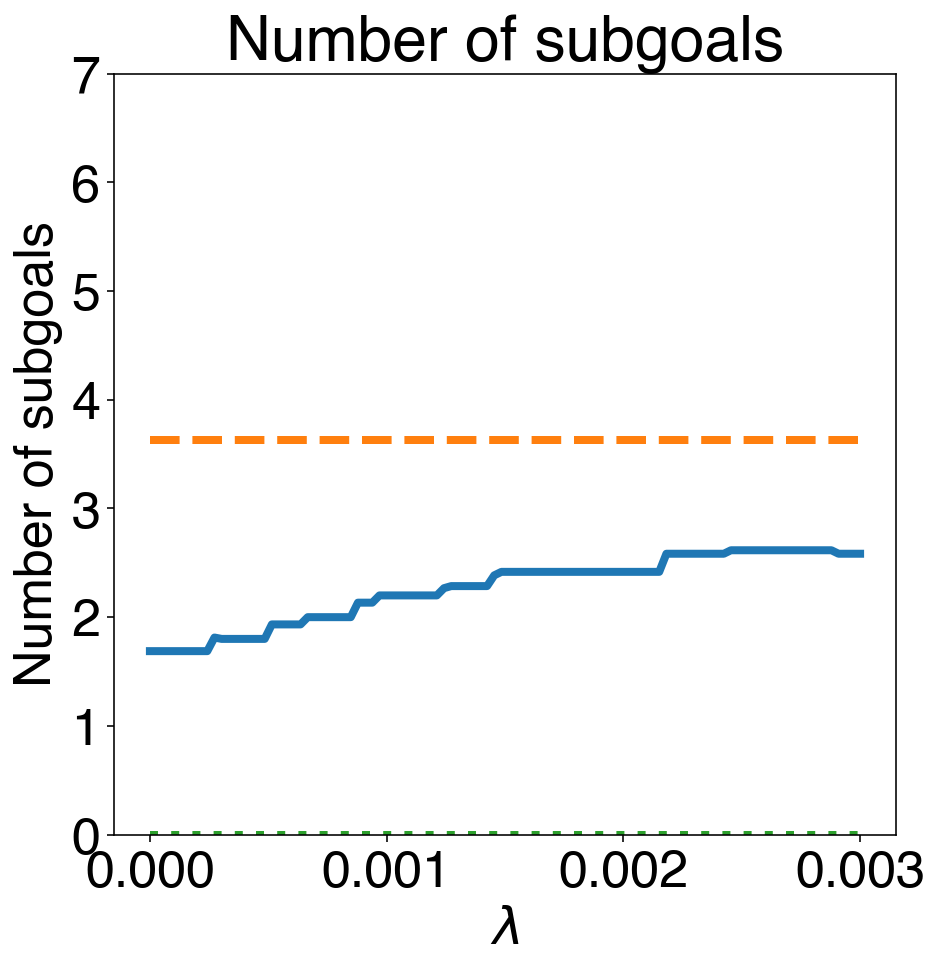

BFS
LinregressResult(slope=529.5455578419105, intercept=1.448948484749573, rvalue=0.9905513922350829, pvalue=2.248943185936067e-86, stderr=7.406003047306563) df: 198 t: 101.63399572380665


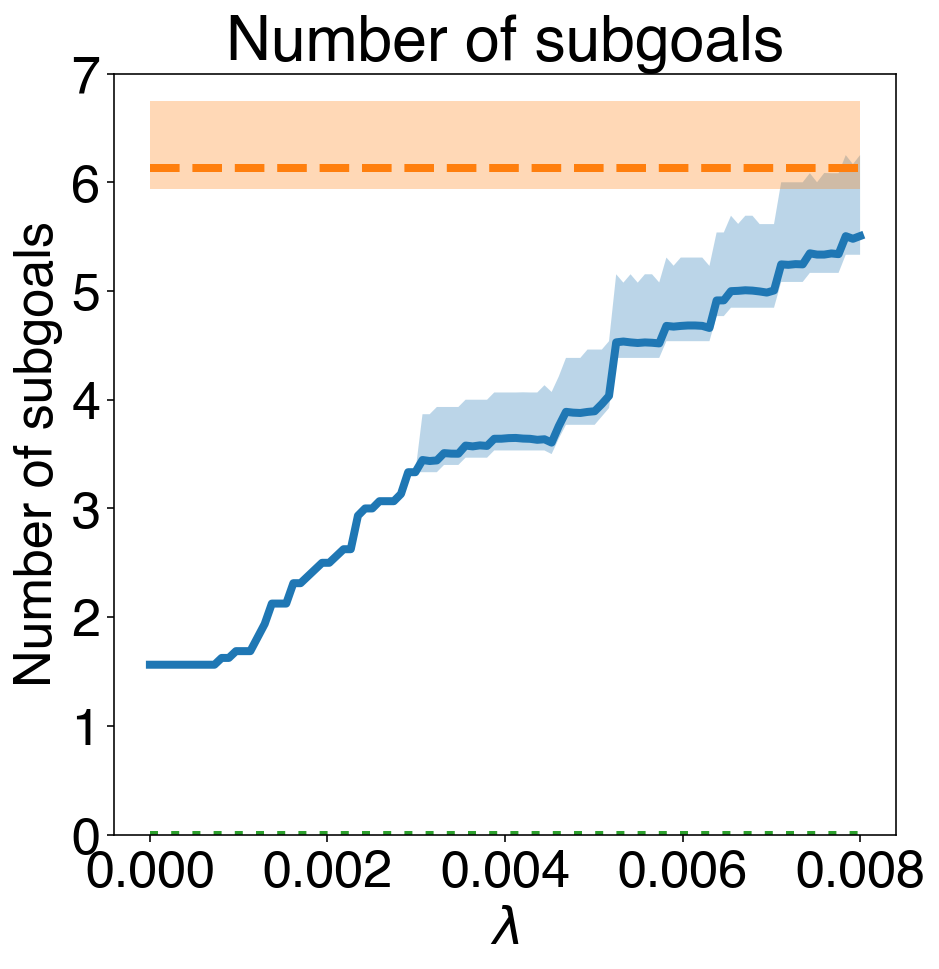

In [198]:
for agent in ["A*", "BFS"]:
    print(agent)
    # plot scoping graph
    index = agent + "\nScoping"
    column = "partial_chosen_sequence_length sum"
    CIs = np.array([list(x) for x in cw_df.dropna()[column]["CI95"][index]]).T
    Xs = cw_df.dropna()[column]["mean"][index].index
    Ys = cw_df.dropna()[column]["mean"][index]
    Error = np.array([Ys - CIs[0], Ys + CIs[1]])
    plt.errorbar(
        Xs,
        Ys,
        #                  yerr=Error,
        label="Scoping",
        linewidth=4,
    )
    plt.fill_between(Xs, CIs[0], CIs[1], alpha=0.3)

    # stats: linear model on scoping line over lambda
    lm = stats.linregress(list(Xs), list(Ys))
    df = len(Xs) + len(Ys) - 2
    t = (lm.rvalue * math.sqrt(df)) / (math.sqrt(1 - (lm.rvalue**2)))
    print(lm, "df:", df, "t:", t)

    # plot lines for full
    index = agent + "\nFull"
    Ys = [cw_df.dropna()[column]["mean"][index]] * len(Xs)
    CIs = np.array([list(x) for x in cw_df.dropna()[column]["CI95"][index]]).T
    Error = np.array([Ys - CIs[0], Ys + CIs[1]])
    plt.errorbar(Xs, Ys, label="Full", linestyle="--", linewidth=4)
    plt.fill_between(Xs, CIs[0], CIs[1], alpha=0.3)

    # plot line for action level
    index = agent + "\nAction level"
    Ys = [cw_df[column]["mean"][index].dropna()] * len(Xs)
    CIs = np.array([list(x) for x in cw_df[column]["CI95"][index].dropna()]).T
    Error = np.array([Ys - CIs[0], Ys + CIs[1]])
    plt.errorbar(Xs, Ys, label="Action level", linestyle=":", linewidth=4)
    plt.fill_between(Xs, CIs[0], CIs[1], alpha=0.3)

    plt.title("Number of subgoals")
    plt.ylabel("Number of subgoals")
    #     plt.yscale('log')
    plt.xlabel("$\lambda$")
    #     plt.legend()
    plt.ylim(0, 7)
    plt.savefig(
        "../results/plots/num_subgoals_lambda" + agent + ".png", bbox_inches="tight"
    )
    plt.show()

In [203]:
bootstrap_pearsons_r_lambda(wfdf, "partial_chosen_sequence_length sum")

A*
Scoping



mean: 0.9642896556795777 	 CI: [0.96428966 0.96428966] 	 p: 0.0 	 df: 192
BFS
Scoping



mean: 0.9818182275488507 	 CI: [0.97631014 0.9860201 ] 	 p: 0.0 	 df: 192


{'A*\nScoping': {'mean': 0.9642896556795777,
  'CI95': array([0.96428966, 0.96428966]),
  'p': 0.0,
  'df': 192},
 'BFS\nScoping': {'mean': 0.9818182275488507,
  'CI95': array([0.97631014, 0.9860201 ]),
  'p': 0.0,
  'df': 192}}

#### Total subgoal planning cost (full planner not shown because too large)

A*
LinregressResult(slope=115404960.536485, intercept=724444.5254251262, rvalue=0.9202841132251754, pvalue=1.0025911136795929e-41, stderr=4956152.936858797) df: 198 t: 33.097815807794284


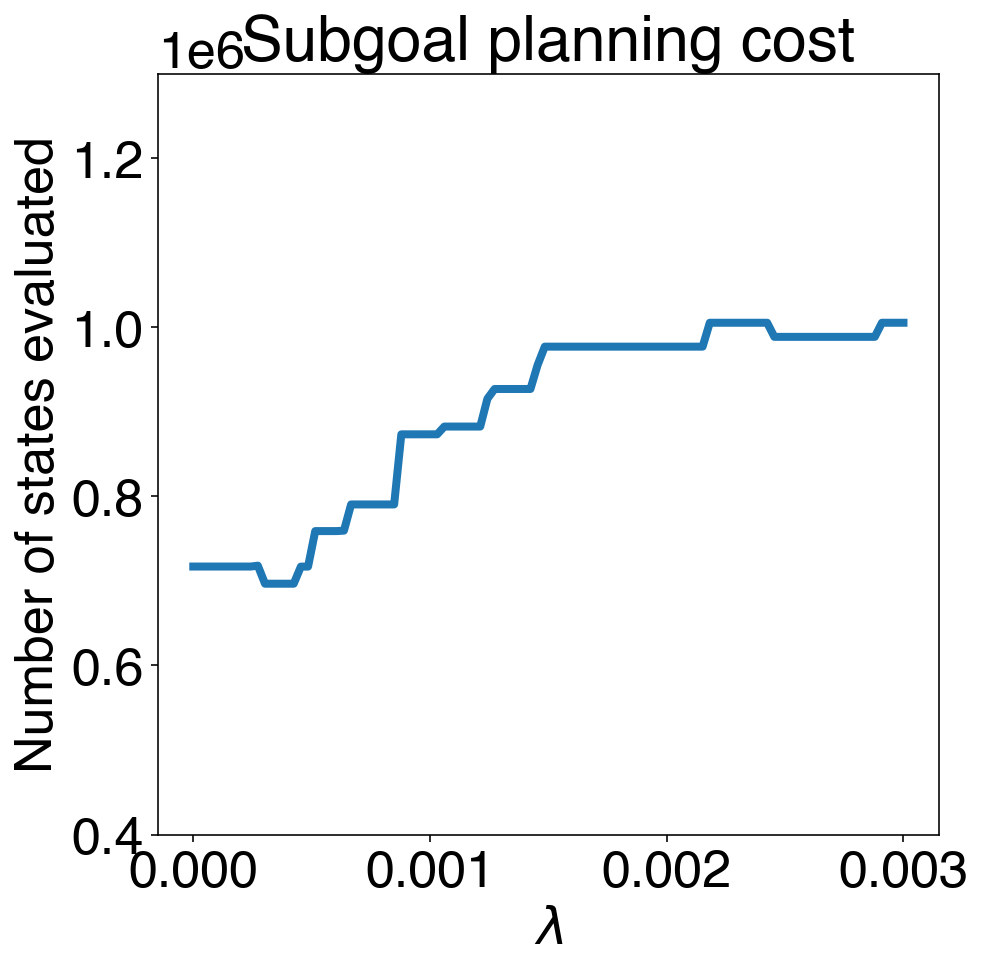

BFS
LinregressResult(slope=88933364.48429008, intercept=470201.00191238365, rvalue=0.9776364743347056, pvalue=3.576770365490326e-68, stderr=1932491.7850431607) df: 198 t: 65.41338500032292


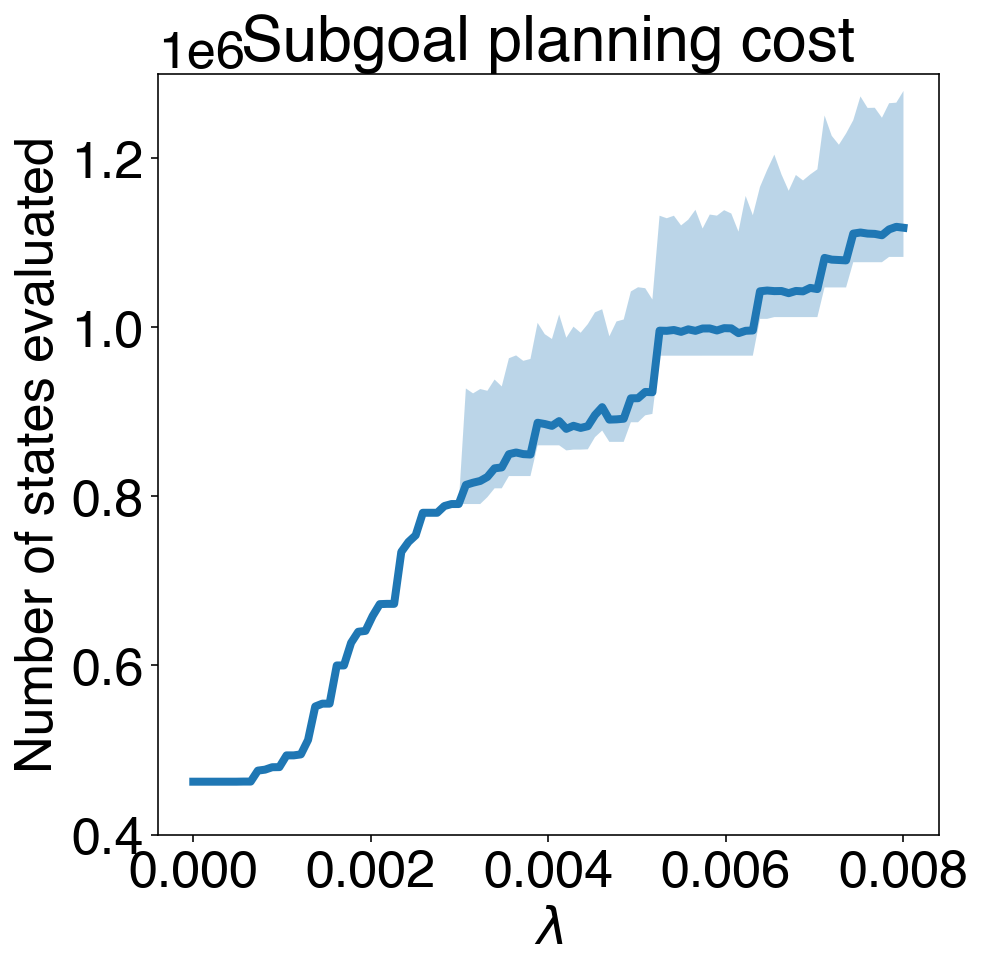

In [199]:
for agent in ["A*", "BFS"]:
    print(agent)
    # plot scoping graph
    index = agent + "\nScoping"
    column = "all_sequences_planning_cost sum"
    CIs = np.array([list(x) for x in cw_df.dropna()[column]["CI95"][index]]).T
    Xs = cw_df.dropna()[column]["mean"][index].index
    Ys = cw_df.dropna()[column]["mean"][index]
    Error = np.array([Ys - CIs[0], Ys + CIs[1]])
    plt.errorbar(
        Xs,
        Ys,
        #                  yerr=Error,
        label="Scoping",
        linewidth=4,
    )
    plt.fill_between(Xs, CIs[0], CIs[1], alpha=0.3)

    # stats: linear model on scoping line over lambda
    lm = stats.linregress(list(Xs), list(Ys))
    df = len(Xs) + len(Ys) - 2
    t = (lm.rvalue * math.sqrt(df)) / (math.sqrt(1 - (lm.rvalue**2)))
    print(lm, "df:", df, "t:", t)

    #     #plot lines for full
    #     index = agent+"\nFull"
    #     Ys = [cw_df.dropna()[column]['mean'][index]]*len(Xs)
    #     CIs = np.array([list(x) for x in cw_df.dropna()[column]['CI95'][index]]).T
    #     Error = np.array([Ys - CIs[0],Ys + CIs[1]])
    #     plt.errorbar(Xs,             Ys,             label='Full',linestyle = '--')
    #     plt.fill_between(Xs, CIs[0], CIs[1],alpha=0.3)

    #     #plot line for action level
    #     index = agent+"\nAction level"
    #     Ys = [cw_df[column]['mean'][index].dropna()]*len(Xs)
    #     CIs = np.array([list(x) for x in cw_df[column]['CI95'][index].dropna()]).T
    #     Error = np.array([Ys - CIs[0],Ys + CIs[1]])
    #     plt.errorbar(Xs,             Ys,             label='Action level',linestyle = ':')
    #     plt.fill_between(Xs, CIs[0], CIs[1],alpha=0.3)

    plt.title("Subgoal planning cost")
    plt.ylabel("Number of states evaluated")
    #     plt.yscale('log')
    plt.xlabel("$\lambda$")
    #     plt.legend()
    plt.ylim(0.4e6, 1.3e6)
    plt.savefig(
        "../results/plots/subgoal_planning_cost_lambda" + agent + ".png",
        bbox_inches="tight",
    )
    plt.show()

In [204]:
bootstrap_pearsons_r_lambda(wfdf, "all_sequences_planning_cost sum")

A*
Scoping



mean: 0.9202841132251751 	 CI: [0.92028411 0.92028411] 	 p: 0.0 	 df: 192
BFS
Scoping



mean: 0.9610956467307686 	 CI: [0.94980528 0.97013698] 	 p: 0.0 	 df: 192


{'A*\nScoping': {'mean': 0.9202841132251751,
  'CI95': array([0.92028411, 0.92028411]),
  'p': 0.0,
  'df': 192},
 'BFS\nScoping': {'mean': 0.9610956467307686,
  'CI95': array([0.94980528, 0.97013698]),
  'p': 0.0,
  'df': 192}}

---

## Sandgraph! 🏝

Since loading the pickled data takes too long, we sketchily recreate the names from the string of the decomposition

In [101]:
from matplotlib.patches import Rectangle
from matplotlib import cm

In [102]:
cmap = cm.plasma.colors


def get_color(index, max=9):
    return cmap[round(index / max * (len(cmap) - 1))]

Let's plot

In [ ]:
# lambda first

lambda_sorted_oneadf = df.sort_values(
    ["c_weight", "world"]
)  # sorted by lambda and world
# lambda_sorted_oneadf = oneadf.sort_values(['world','c_weight']) #sorted by lambda and world

lambda_sorted_oneadf = lambda_sorted_oneadf[
    ~lambda_sorted_oneadf["note"].str.contains("Action level")
]

for las in lambda_sorted_oneadf["note"].unique():
    # get names
    names = []
    for run in lambda_sorted_oneadf.query("note == @las").groupby("run_ID", sort=False):
        silhouettes = run[1]["decomposed_silhouette"].dropna()
        _names = [np.sum(str2array(s).sum(axis=1) != 0) for s in silhouettes]
        names.append(_names)
    #         print(run[1]['c_weight'].head(1).item(),run[1]['world'].head(1).item())
    # plot the sand graph
    plt.plot()
    for x, n in enumerate(names):
        for i, g in enumerate(reversed(n)):
            plt.gca().add_patch(
                Rectangle((x, 0), 1, g, facecolor=get_color(len(n) - i))
            )
    plt.title(str(las))
    plt.xlabel("Iteration sorted by $\lambda$")
    # add back lambda ticks
    lambdas = list(lambda_sorted_oneadf["c_weight"].unique())
    plt.xticks(
        np.linspace(0, len(names), len(lambdas) + 1), lambdas + [""]
    )  # assuming we have equally many observations for each lambda
    plt.ylabel("Vertical location of subgoal")
    plt.show()

In [ ]:
# world first

lambda_sorted_oneadf = df.sort_values(
    ["world", "c_weight"]
)  # sorted by lambda and world

lambda_sorted_oneadf = lambda_sorted_oneadf[
    ~lambda_sorted_oneadf["note"].str.contains("Action level")
]

for las in lambda_sorted_oneadf["note"].unique():
    print(las)
    # get names
    names = []
    worlds = []
    for run in lambda_sorted_oneadf.query("note == @las").groupby("run_ID", sort=False):
        if "Scoping" in run[1]["note"].head(1).item():  # special case for scoping
            _names = (
                run[1]["chosen_sequence_names"].dropna().apply(lambda x: x[0]).to_list()
            )  # get names for run in format [1,2,3]. Assumes that we only acted one subgoal
        else:  # Full planner—we need to grab the chosen sequence
            _names = run[1][run[1]["final_row"] == True][
                "chosen_sequence_names"
            ].to_list()[0]
        #         _names = [np.sum(str2array(s).sum(axis=1) != 0) for s in silhouettes]
        names.append(sorted(list(set(_names))))  # ideally, we shouldn't have to sort
        worlds.append(
            run[1]["world"].head(1).item()
        )  # save which world it belonged to. We have already sorted by world
    #     print(names)
    # plot the sand graph
    plt.plot()  # create empty plot
    last_world = worlds[0]  # initialize world
    for x, n in enumerate(names):
        for i, g in enumerate(reversed(n)):
            plt.gca().add_patch(
                Rectangle((x, 0), 1, g, facecolor=get_color(len(n) - i))
            )
        # draw world demarkator
        if worlds[x] != last_world:
            plt.gca().add_patch(
                Rectangle((x, -0.2), len(names) / 256, 8.4, facecolor="grey")
            )
        last_world = worlds[x]
    plt.title(str(las))
    #     plt.xlabel("Iteration sorted by $\lambda$")
    # add back lambda ticks
    lambdas = list(lambda_sorted_oneadf["c_weight"].unique())
    #     plt.xticks(np.linspace(0,len(names),len(lambdas) + 1), lambdas+[""]) #assuming we have equally many observations for each lambda
    plt.ylabel("Vertical location of subgoal")
    plt.savefig("../results/plots/sandplot" + las + ".png")
    plt.show()

## Action level cost table

How do action level search algorithms with different parameter settings fare on the block construction task?

In [453]:
tf_paths = [
    #     'Baselines_small.csv'
    "Baselines.csv"
]

In [454]:
# load all experiments as one dataframe from CSV
t_df = pd.concat(
    [
        pd.read_csv(os.path.join(DF_DIR, l))
        if ".csv" in l
        else pd.read_pickle(os.path.join(DF_DIR, l))
        for l in tf_paths
    ]
)
print("Loaded dataframe(s)")
t_df = t_df.reset_index()

Loaded dataframe(s)


In [459]:
t_fdf = t_df.groupby("run_ID").agg(
    {
        "agent_label": item,
        "world": item,
        "states_evaluated": sum,
        "max_steps": item,  # for A*
        "horizon": item,  # not for A*
        "world_status": lambda x: x.tail(1).item(),
    }
)

# flatten the dataframe to remove multi-index for next groupby
t_fdf.reset_index(inplace=True)
t_fdf["world_float"] = t_fdf["world_status"].replace(
    ["Fail", "Ongoing", "Win"], [0, 0, 1]
)

In [468]:
t_fdf["world item"] = t_fdf["world"]  # change name for bootstrapping

Use the full dataframe to get an estimate of **rate of success**.

In [474]:
# which columns do we want in our bootstrapped boostrapped_baselines_fdf?
columns = ["world_float", "states_evaluated"]

# initialize df
rows = {}

for agent in t_fdf["agent_label"].unique():
    # keep helpful rows
    agent_selection = t_fdf[t_fdf == agent]
    new_row = {
        ("agent", ""): agent,
        ("label", ""): str(agent_selection["agent_label"].unique()),
        ("max_steps", ""): str(agent_selection["max_steps"].unique()),
        ("horizon", ""): str(agent_selection["horizon"].unique()),
    }
    for column in columns:
        print(agent, column, end="\r")
        # bootstrap
        mean, CI = bootstrap(t_fdf[t_fdf["agent_label"] == agent], column)
        # insert into dictionary
        new_row[(column, "mean")] = mean
        new_row[(column, "CI95")] = np.array(CI)
    rows[agent] = new_row

# create df
boostrapped_baselines_fdf = pd.DataFrame(rows).transpose()

In [481]:
boostrapped_baselines_fdf  # for success

agent  \
                                                                                                                                                                                                            
{'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 4096, 'dense_stability': False}       {'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 4096, 'dense_stability': False}   
{'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 64, 'dense_stability': False}           {'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 64, 'dense_stability': False}   
{'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 65536, 'dense_stability': False}     {'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 65536, 'dense_stability': False}   
{'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 8, 'dense_stability': False}             {'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 8, 'dense_stability': False}   
{'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 1, 'first_soluti...  {'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 1, 'first_solut...   
{'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 2, 'first_soluti...  {'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 2, 'first_solut...   
{'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 3, 'first_soluti...  {'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 3, 'first_solut...   
{'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 4, 'first_soluti...  {'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 4, 'first_solut...   
{'agent_type': 'BFS_Agent', 'scoring_function': 'random_scoring', 'horizon': 1, 'first_solution':...  {'agent_type': 'BFS_Agent', 'scoring_function': 'random_scoring', 'horizon': 1, 'first_solution'...   

                                                                                                                                                                                                    label  \
                                                                                                                                                                                                            
{'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 4096, 'dense_stability': False}     ["{'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 4096, 'dense_stability': Fal...   
{'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 64, 'dense_stability': False}       [nan\n "{'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 64, 'dense_stability':...   
{'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 65536, 'dense_stability': False}    [nan\n "{'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 65536, 'dense_stabilit...   
{'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 8, 'dense_stability': False}        [nan\n "{'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 8, 'dense_stability': ...   
{'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 1, 'first_soluti...  [nan\n "{'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 1, 'fir...   
{'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 2, 'first_soluti...  [nan\n "{'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 2, 'fir...   
{'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 3, 'first_soluti...  [nan\n "{'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 3, 'fir...   
{'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 4, 'first_solu

Now, let's condition on success to get the actual **cost** estimate

In [476]:
t_wfdf = t_fdf[t_fdf["world_float"] == 1]

In [477]:
# which columns do we want in our bootstrapped boostrapped_baselines_wfdf?
columns = ["states_evaluated"]

# initialize df
rows = {}

for agent in t_fdf["agent_label"].unique():
    # keep helpful rows
    agent_selection = t_wfdf[t_wfdf == agent]
    new_row = {
        ("agent", ""): agent,
        ("label", ""): str(agent_selection["agent_label"].unique()),
        ("max_steps", ""): str(agent_selection["max_steps"].unique()),
        ("horizon", ""): str(agent_selection["horizon"].unique()),
    }
    for column in columns:
        print(agent, column, end="\r")
        # bootstrap
        mean, CI = bootstrap(t_wfdf[t_wfdf["agent_label"] == agent], column)
        # insert into dictionary
        new_row[(column, "mean")] = mean
        new_row[(column, "CI95")] = np.array(CI)
    rows[agent] = new_row

# create df
boostrapped_baselines_wfdf = pd.DataFrame(rows).transpose()

In [480]:
boostrapped_baselines_wfdf  # for cost

agent  \
                                                                                                                                                                                                            
{'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 4096, 'dense_stability': False}       {'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 4096, 'dense_stability': False}   
{'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 64, 'dense_stability': False}           {'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 64, 'dense_stability': False}   
{'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 65536, 'dense_stability': False}     {'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 65536, 'dense_stability': False}   
{'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 8, 'dense_stability': False}             {'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 8, 'dense_stability': False}   
{'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 1, 'first_soluti...  {'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 1, 'first_solut...   
{'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 2, 'first_soluti...  {'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 2, 'first_solut...   
{'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 3, 'first_soluti...  {'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 3, 'first_solut...   
{'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 4, 'first_soluti...  {'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 4, 'first_solut...   
{'agent_type': 'BFS_Agent', 'scoring_function': 'random_scoring', 'horizon': 1, 'first_solution':...  {'agent_type': 'BFS_Agent', 'scoring_function': 'random_scoring', 'horizon': 1, 'first_solution'...   

                                                                                                                                                                                                    label  \
                                                                                                                                                                                                            
{'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 4096, 'dense_stability': False}     ["{'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 4096, 'dense_stability': Fal...   
{'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 64, 'dense_stability': False}       [nan\n "{'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 64, 'dense_stability':...   
{'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 65536, 'dense_stability': False}    [nan\n "{'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 65536, 'dense_stabilit...   
{'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 8, 'dense_stability': False}        [nan\n "{'agent_type': 'Astar_Agent', 'heuristic': 'recall', 'max_steps': 8, 'dense_stability': ...   
{'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 1, 'first_soluti...  [nan\n "{'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 1, 'fir...   
{'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 2, 'first_soluti...  [nan\n "{'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 2, 'fir...   
{'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 3, 'first_soluti...  [nan\n "{'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 3, 'fir...   
{'agent_type': 'BFS_Agent', 'scoring_function': 'F1_stability_score', 'horizon': 4, 'first_solu

## How many subgoals do we actually find in the solver?

In [118]:
solver_df_paths = [
    "subgoal planning Astar 512.pkl",
    "subgoal planning full Astar_c6.pkl",
    "subgoal planning full BFS1.pkl",
    "subgoal planning full BFS2.pkl",
    "subgoal planning full BFS3.pkl",
    "subgoal planning full Astar classic.pkl",
    "subgoal planning full Astar_rep.pkl",
    "subgoal planning full Astar.pkl",
]

In [119]:
# load all experiments as one dataframe from CSV
solver_df = pd.concat(
    [pd.read_pickle(os.path.join(DF_DIR, l)) for l in solver_df_paths]
)
print("Loaded dataframe(s)")

Loaded dataframe(s)


In [120]:
solver_df.groupby("agent_attributes").agg(
    {
        "n_solved_sequences": ["mean", "min", "max"],
        "all_sequences_planning_cost": "mean",
    }
)

n_solved_sequences  \
                                                                                                                   mean   
agent_attributes                                                                                                          
{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 8, 'decomposition_function': 'Horizon...           83.43750   
{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 8, 'decomposition_function': 'Horizon...           44.06250   
{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 8, 'decomposition_function': 'Horizon...           65.56250   
{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 8, 'decomposition_function': 'Horizon...           59.86875   
{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 8, 'decomposition_function': 'Horizon...           76.06250   
{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 8, 'decomposition_function': 'Horizon...           58.62500   
{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 8, 'decomposition_function': 'Horizon...           77.18750   
{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 8, 'decomposition_function': 'Horizon...           75.25000   

                                                                                                          \
                                                                                                     min   
agent_attributes                                                                                           
{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 8, 'decomposition_function': 'Horizon...  12   
{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 8, 'decomposition_function': 'Horizon...   0   
{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 8, 'decomposition_function': 'Horizon...   9   
{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 8, 'decomposition_function': 'Horizon...   0   
{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 8, 'decomposition_function': 'Horizon...  11   
{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 8, 'decomposition_function': 'Horizon...   0   
{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 8, 'decomposition_function': 'Horizon...   0   
{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 8, 'decomposition_function': 'Horizon...  11   

                                                                                                           \
                                                                                                      max   
agent_attributes                                                                                            
{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 8, 'decomposition_function': 'Horizon...  255   
{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 8, 'decomposition_function': 'Horizon...  213   
{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 8, 'decomposition_function': 'Horizon...  255   
{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 8, 'decomposition_function': 'Horizon...  255   
{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 8, 'decomposition_function': 'Horizon...  255   
{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 8, 'decomposition_function': 'Horizon...  255   
{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 8, 'decomposition_function': 'Horizon...  255   
{'agent_type': 'Subgoal_Planning_Agent', 'sequence_length': 8, 'decomposition_function': 'Horizon...  255   

                                                                                                     all_sequences_planning_cost  
                                                                                                                            mean  
agent_attributes                                                                                

In [122]:
solvseq_df = pd.read_pickle(os.path.join(DF_DIR, "subgoal planning full Astar.pkl"))

In [125]:
[
    (s.names(), s.complete(), s.R(), s.V(1), s.planning_cost())
    for s in allseq
    if s.complete() and s.names()[-1] == 8
]

[((3, 8), True, 52.0, -32856.0, 78113),
 ((1, 3, 8), True, 52.0, -32884.0, 102635),
 ((3, 5, 8), True, 52.0, -69741.0, 73937),
 ((3, 6, 8), True, 52.0, -81964.0, 86160),
 ((3, 7, 8), True, 52.0, -20543.0, 24739),
 ((1, 2, 3, 8), True, 52.0, -16548.0, 57661),
 ((1, 3, 5, 8), True, 52.0, -69769.0, 98459),
 ((1, 3, 6, 8), True, 52.0, -81992.0, 110682),
 ((1, 3, 7, 8), True, 52.0, -20571.0, 49261),
 ((3, 5, 6, 8), True, 52.0, -49268.0, 53464),
 ((3, 5, 7, 8), True, 52.0, -49266.0, 53462),
 ((3, 6, 7, 8), True, 52.0, -81950.0, 86146),
 ((1, 2, 3, 5, 8), True, 52.0, -53433.0, 53485),
 ((1, 2, 3, 6, 8), True, 52.0, -65656.0, 65708),
 ((1, 2, 3, 7, 8), True, 52.0, -4235.0, 4287),
 ((1, 3, 5, 6, 8), True, 52.0, -49296.0, 77986),
 ((1, 3, 5, 7, 8), True, 52.0, -49294.0, 77984),
 ((1, 3, 6, 7, 8), True, 52.0, -81978.0, 110668),
 ((3, 5, 6, 7, 8), True, 52.0, -49254.0, 53450),
 ((1, 2, 3, 5, 6, 8), True, 52.0, -32960.0, 33012),
 ((1, 2, 3, 5, 7, 8), True, 52.0, -32958.0, 33010),
 ((1, 2, 3, 6, 7, 